In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"E:\data_science\project\Internship\SCMS_Delivery_History_Dataset.csv")

In [3]:
df.describe()

ID  Unit of Measure (Per Pack)  Line Item Quantity  \
count  10324.000000                10324.000000        10324.000000   
mean   51098.968229                   77.990895        18332.534870   
std    31944.332496                   76.579764        40035.302961   
min        1.000000                    1.000000            1.000000   
25%    12795.750000                   30.000000          408.000000   
50%    57540.500000                   60.000000         3000.000000   
75%    83648.250000                   90.000000        17039.750000   
max    86823.000000                 1000.000000       619999.000000   

       Line Item Value    Pack Price    Unit Price  Line Item Insurance (USD)  
count     1.032400e+04  10324.000000  10324.000000               10037.000000  
mean      1.576506e+05     21.910241      0.611701                 240.117626  
std       3.452921e+05     45.609223      3.275808                 500.190568  
min       0.000000e+00      0.000000      0.000000                   0.000000  
25%       4.314593e+03      4.120000      0.080000                   6.510000  
50%       3.047147e+04      9.300000      0.160000                  47.040000  
75%       1.664471e+05     23.592500      0.470000                 252.400000  
max       5.951990e+06   1345.640000    238.650000                7708.440000

In [4]:
df.dtypes

ID                                int64
Project Code                     object
PQ                               object
PO / SO                          object
ASN/DN                           object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [4]:
df.columns

Index(['ID', 'Project Code', 'PQ ', 'PO / SO ', 'ASN/DN ', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [5]:
df.shape

(10324, 33)

In [45]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != "object"] 

In [46]:
numeric_features

['ID',
 'Unit of Measure (Per Pack)',
 'Line Item Quantity',
 'Line Item Value',
 'Pack Price',
 'Unit Price',
 'Line Item Insurance (USD)']

In [47]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "object"] 


In [48]:
categorical_features

['Project Code',
 'PQ ',
 'PO / SO ',
 'ASN/DN ',
 'Country',
 'Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'PQ First Sent to Client Date',
 'PO Sent to Vendor Date',
 'Scheduled Delivery Date',
 'Delivered to Client Date',
 'Delivery Recorded Date',
 'Product Group',
 'Sub Classification',
 'Vendor',
 'Item Description',
 'Molecule/Test Type',
 'Brand',
 'Dosage',
 'Dosage Form',
 'Manufacturing Site',
 'First Line Designation',
 'Weight (Kilograms)',
 'Freight Cost (USD)']

In [29]:
df.head()

ID Project Code             PQ  PO / SO  ASN/DN         Country Managed By  \
0   1   100-CI-T01  Pre-PQ Process   SCMS-4   ASN-8  Côte d'Ivoire   PMO - US   
1   3   108-VN-T01  Pre-PQ Process  SCMS-13  ASN-85        Vietnam   PMO - US   
2   4   100-CI-T01  Pre-PQ Process  SCMS-20  ASN-14  Côte d'Ivoire   PMO - US   
3  15   108-VN-T01  Pre-PQ Process  SCMS-78  ASN-50        Vietnam   PMO - US   
4  16   108-VN-T01  Pre-PQ Process  SCMS-81  ASN-55        Vietnam   PMO - US   

   Fulfill Via Vendor INCO Term Shipment Mode  ... Unit of Measure (Per Pack)  \
0  Direct Drop              EXW           Air  ...                         30   
1  Direct Drop              EXW           Air  ...                        240   
2  Direct Drop              FCA           Air  ...                        100   
3  Direct Drop              EXW           Air  ...                         60   
4  Direct Drop              EXW           Air  ...                         60   

  Line Item Quantity Line Item Value Pack Price Unit Price  \
0                 19           551.0      29.00       0.97   
1               1000          6200.0       6.20       0.03   
2                500         40000.0      80.00       0.80   
3              31920        127360.8       3.99       0.07   
4              38000        121600.0       3.20       0.05   

              Manufacturing Site First Line Designation Weight (Kilograms)  \
0     Ranbaxy Fine Chemicals LTD                    Yes                 13   
1      Aurobindo Unit III, India                    Yes                358   
2  ABBVIE GmbH & Co.KG Wiesbaden                    Yes                171   
3  Ranbaxy, Paonta Shahib, India                    Yes               1855   
4      Aurobindo Unit III, India                    Yes               7590   

  Freight Cost (USD) Line Item Insurance (USD)  
0             780.34                       NaN  
1             4521.5                       NaN  
2            1653.78                       NaN  
3           16007.06                       NaN  
4           45450.08                       NaN  

[5 rows x 33 columns]

In [10]:
df['Shipment Mode'].value_counts()

Shipment Mode
Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: count, dtype: int64

In [8]:
df.columns

Index(['ID', 'Project Code', 'PQ ', 'PO / SO ', 'ASN/DN ', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [30]:



df.columns=df.columns.str.lower()

In [31]:
df.columns=df.columns.str.replace(" ","_")

In [32]:
df.isnull().sum()

id                                 0
project_code                       0
pq_                                0
po_/_so_                           0
asn/dn_                            0
country                            0
managed_by                         0
fulfill_via                        0
vendor_inco_term                   0
shipment_mode                    360
pq_first_sent_to_client_date       0
po_sent_to_vendor_date             0
scheduled_delivery_date            0
delivered_to_client_date           0
delivery_recorded_date             0
product_group                      0
sub_classification                 0
vendor                             0
item_description                   0
molecule/test_type                 0
brand                              0
dosage                          1736
dosage_form                        0
unit_of_measure_(per_pack)         0
line_item_quantity                 0
line_item_value                    0
pack_price                         0
u

# Heat map check the missing values in the data 

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isna())
plt.title("No of Missing data present in our columns")
plt.show()

In this data there columns contain missing value shipment_mode, dosage, line_item_insurance_(usd)

In [13]:
df.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)',
       'line_item_insurance_(usd)'],
      dtype='object')

In [33]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != "object"] 
categorical_features = [feature for feature in df.columns if df[feature].dtype == "object"] 

In [35]:
numeric_features

['id',
 'unit_of_measure_(per_pack)',
 'line_item_quantity',
 'line_item_value',
 'pack_price',
 'unit_price',
 'line_item_insurance_(usd)']

In [34]:
num_data=df[numeric_features]

In [16]:
num_data

id  unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0          1                          30                  19           551.00   
1          3                         240                1000          6200.00   
2          4                         100                 500         40000.00   
3         15                          60               31920        127360.80   
4         16                          60               38000        121600.00   
...      ...                         ...                 ...              ...   
10319  86818                          60              166571        599655.60   
10320  86819                          60               21072        137389.44   
10321  86821                          30              514526       5140114.74   
10322  86822                          60               17465        113871.80   
10323  86823                          60               36639         72911.61   

       pack_price  unit_price  line_item_insurance_(usd)  
0           29.00        0.97                        NaN  
1            6.20        0.03                        NaN  
2           80.00        0.80                        NaN  
3            3.99        0.07                        NaN  
4            3.20        0.05                        NaN  
...           ...         ...                        ...  
10319        3.60        0.06                     705.79  
10320        6.52        0.11                     161.71  
10321        9.99        0.33                    5284.04  
10322        6.52        0.11                     134.03  
10323        1.99        0.03                      85.82  

[10324 rows x 7 columns]

In [17]:
cat_data=df[categorical_features]

In [18]:
cat_data.columns

Index(['project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'manufacturing_site', 'first_line_designation',
       'weight_(kilograms)', 'freight_cost_(usd)'],
      dtype='object')

In [19]:
num_data.drop(["id"],axis=1,inplace=True)

In [20]:
num_data

unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                              30                  19           551.00   
1                             240                1000          6200.00   
2                             100                 500         40000.00   
3                              60               31920        127360.80   
4                              60               38000        121600.00   
...                           ...                 ...              ...   
10319                          60              166571        599655.60   
10320                          60               21072        137389.44   
10321                          30              514526       5140114.74   
10322                          60               17465        113871.80   
10323                          60               36639         72911.61   

       pack_price  unit_price  line_item_insurance_(usd)  
0           29.00        0.97                        NaN  
1            6.20        0.03                        NaN  
2           80.00        0.80                        NaN  
3            3.99        0.07                        NaN  
4            3.20        0.05                        NaN  
...           ...         ...                        ...  
10319        3.60        0.06                     705.79  
10320        6.52        0.11                     161.71  
10321        9.99        0.33                    5284.04  
10322        6.52        0.11                     134.03  
10323        1.99        0.03                      85.82  

[10324 rows x 6 columns]

# Univariate analysis on numerical data

In [21]:
num_data.isnull().sum()

unit_of_measure_(per_pack)      0
line_item_quantity              0
line_item_value                 0
pack_price                      0
unit_price                      0
line_item_insurance_(usd)     287
dtype: int64

In [22]:
num_data["line_item_insurance_(usd)"] = num_data["line_item_insurance_(usd)"].replace("NaN", np.nan)


In [23]:
median_value = num_data["line_item_insurance_(usd)"].median()

In [24]:
num_data["line_item_insurance_(usd)"].fillna(median_value,inplace=True)

In [25]:
num_data

unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                              30                  19           551.00   
1                             240                1000          6200.00   
2                             100                 500         40000.00   
3                              60               31920        127360.80   
4                              60               38000        121600.00   
...                           ...                 ...              ...   
10319                          60              166571        599655.60   
10320                          60               21072        137389.44   
10321                          30              514526       5140114.74   
10322                          60               17465        113871.80   
10323                          60               36639         72911.61   

       pack_price  unit_price  line_item_insurance_(usd)  
0           29.00        0.97                      47.04  
1            6.20        0.03                      47.04  
2           80.00        0.80                      47.04  
3            3.99        0.07                      47.04  
4            3.20        0.05                      47.04  
...           ...         ...                        ...  
10319        3.60        0.06                     705.79  
10320        6.52        0.11                     161.71  
10321        9.99        0.33                    5284.04  
10322        6.52        0.11                     134.03  
10323        1.99        0.03                      85.82  

[10324 rows x 6 columns]

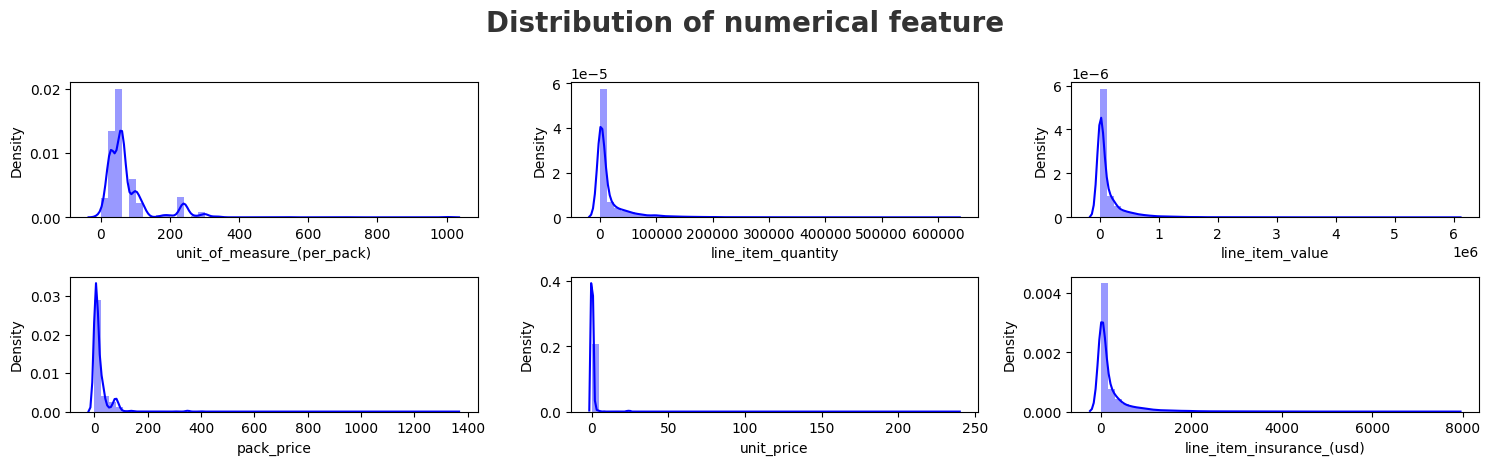

In [26]:
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of numerical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i, col in enumerate(num_data.columns):
    plt.subplot(5, 3, i+1)
    sns.distplot(df[col], color='blue')
    plt.xlabel(col)
    plt.tight_layout()

In [27]:
num_data.isnull().sum()

unit_of_measure_(per_pack)    0
line_item_quantity            0
line_item_value               0
pack_price                    0
unit_price                    0
line_item_insurance_(usd)     0
dtype: int64

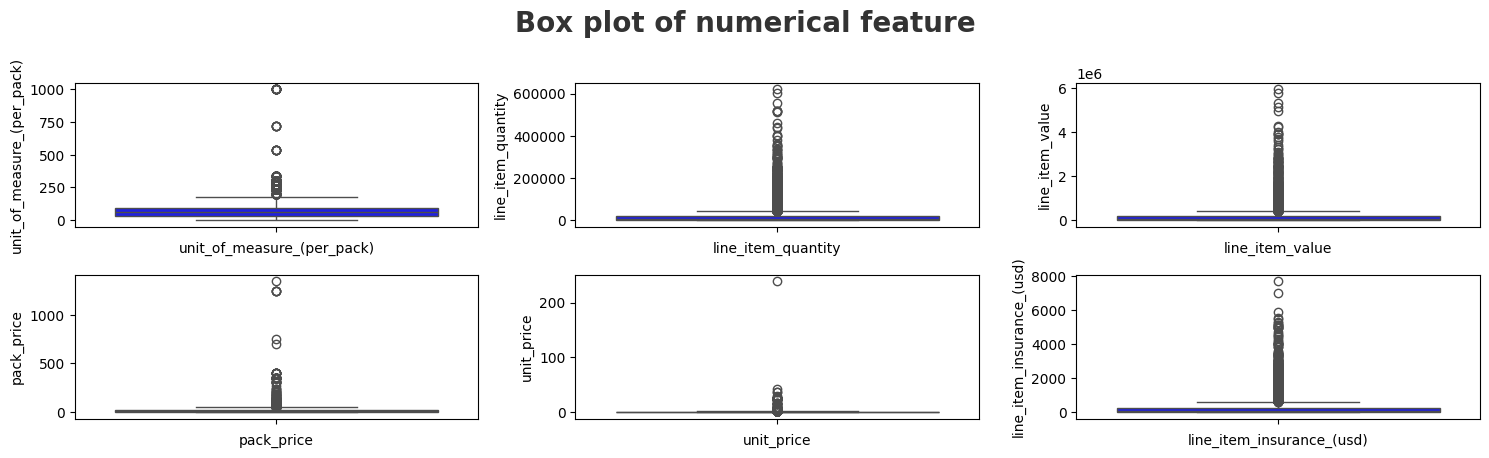

In [28]:
plt.figure(figsize=(15, 10))
plt.suptitle('Box plot of numerical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i, col in enumerate(num_data.columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(df[col], color='blue')
    plt.xlabel(col)
    plt.tight_layout()

# Removal of outliers from the numerical data

In [29]:
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = num_data[col].quantile(0.25)
    percentile75 = num_data[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    num_data[col] = np.where(num_data[col]>upper_limit, upper_limit, np.where(num_data[col]<lower_limit,lower_limit,num_data[col]))
    return num_data[col]


In [30]:

for i in num_data:
    print(i)
    remove_outliers_IQR(i)
    print("-----------------------------------------------------------\n")
   
    
    

unit_of_measure_(per_pack)
percentile25 30.0
percentile75 90.0
Upper limit 180.0
Lower limit -60.0
-----------------------------------------------------------

line_item_quantity
percentile25 408.0
percentile75 17039.75
Upper limit 41987.375
Lower limit -24539.625
-----------------------------------------------------------

line_item_value
percentile25 4314.592500000001
percentile75 166447.13999999998
Upper limit 409645.96124999993
Lower limit -238884.22874999998
-----------------------------------------------------------

pack_price
percentile25 4.12
percentile75 23.5925
Upper limit 52.80125
Lower limit -25.08875
-----------------------------------------------------------

unit_price
percentile25 0.08
percentile75 0.47
Upper limit 1.055
Lower limit -0.505
-----------------------------------------------------------

line_item_insurance_(usd)
percentile25 7.03
percentile75 241.75
Upper limit 593.8299999999999
Lower limit -345.05
----------------------------------------------------------

In [31]:
plt.figure(figsize=(15, 10))
plt.suptitle('box plot of numerical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i, col in enumerate(num_data.columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(num_data[col], color='blue')
    plt.xlabel(col)
    plt.tight_layout()

In [32]:
num_data


unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                            30.0              19.000        551.00000   
1                           180.0            1000.000       6200.00000   
2                           100.0             500.000      40000.00000   
3                            60.0           31920.000     127360.80000   
4                            60.0           38000.000     121600.00000   
...                           ...                 ...              ...   
10319                        60.0           41987.375     409645.96125   
10320                        60.0           21072.000     137389.44000   
10321                        30.0           41987.375     409645.96125   
10322                        60.0           17465.000     113871.80000   
10323                        60.0           36639.000      72911.61000   

       pack_price  unit_price  line_item_insurance_(usd)  
0        29.00000        0.97                      47.04  
1         6.20000        0.03                      47.04  
2        52.80125        0.80                      47.04  
3         3.99000        0.07                      47.04  
4         3.20000        0.05                      47.04  
...           ...         ...                        ...  
10319     3.60000        0.06                     593.83  
10320     6.52000        0.11                     161.71  
10321     9.99000        0.33                     593.83  
10322     6.52000        0.11                     134.03  
10323     1.99000        0.03                      85.82  

[10324 rows x 6 columns]

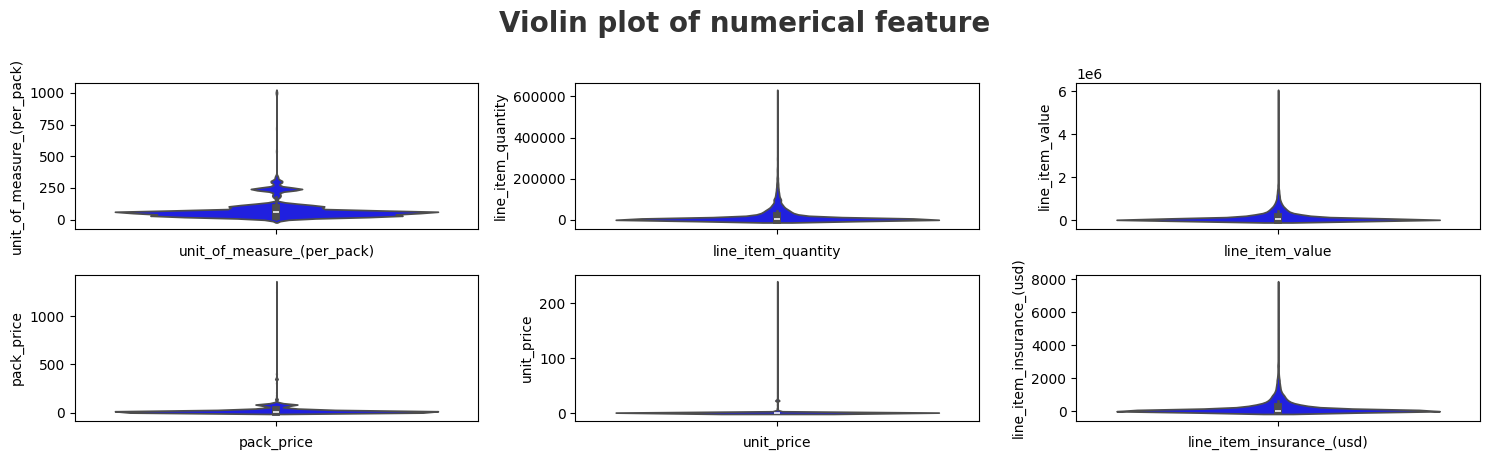

In [33]:
plt.figure(figsize=(15, 10))
plt.suptitle('Violin plot of numerical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i, col in enumerate(num_data.columns):
    plt.subplot(5, 3, i+1)
    sns.violinplot(df[col], color='blue')
    plt.xlabel(col)
    plt.tight_layout()


In [34]:
data=pd.concat([num_data,cat_data],axis=1)

In [35]:
data

unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                            30.0              19.000        551.00000   
1                           180.0            1000.000       6200.00000   
2                           100.0             500.000      40000.00000   
3                            60.0           31920.000     127360.80000   
4                            60.0           38000.000     121600.00000   
...                           ...                 ...              ...   
10319                        60.0           41987.375     409645.96125   
10320                        60.0           21072.000     137389.44000   
10321                        30.0           41987.375     409645.96125   
10322                        60.0           17465.000     113871.80000   
10323                        60.0           36639.000      72911.61000   

       pack_price  unit_price  line_item_insurance_(usd) project_code  \
0        29.00000        0.97                      47.04   100-CI-T01   
1         6.20000        0.03                      47.04   108-VN-T01   
2        52.80125        0.80                      47.04   100-CI-T01   
3         3.99000        0.07                      47.04   108-VN-T01   
4         3.20000        0.05                      47.04   108-VN-T01   
...           ...         ...                        ...          ...   
10319     3.60000        0.06                     593.83   103-ZW-T30   
10320     6.52000        0.11                     161.71   104-CI-T30   
10321     9.99000        0.33                     593.83   110-ZM-T30   
10322     6.52000        0.11                     134.03   200-ZW-T30   
10323     1.99000        0.03                      85.82   103-ZW-T30   

                 pq_# po_/_so_# asn/dn_#  ...  \
0      Pre-PQ Process    SCMS-4    ASN-8  ...   
1      Pre-PQ Process   SCMS-13   ASN-85  ...   
2      Pre-PQ Process   SCMS-20   ASN-14  ...   
3      Pre-PQ Process   SCMS-78   ASN-50  ...   
4      Pre-PQ Process   SCMS-81   ASN-55  ...   
...               ...       ...      ...  ...   
10319       FPQ-15197  SO-50020  DN-4307  ...   
10320       FPQ-15259  SO-50102  DN-4313  ...   
10321       FPQ-14784  SO-49600  DN-4316  ...   
10322       FPQ-16523  SO-51680  DN-4334  ...   
10323       FPQ-15197  SO-50022  DN-4336  ...   

                                                  vendor  \
0                            RANBAXY Fine Chemicals LTD.   
1                               Aurobindo Pharma Limited   
2                                   Abbott GmbH & Co. KG   
3      SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...   
4                               Aurobindo Pharma Limited   
...                                                  ...   
10319                                      SCMS from RDC   
10320                                      SCMS from RDC   
10321                                      SCMS from RDC   
10322                                      SCMS from RDC   
10323                                      SCMS from RDC   

                                        item_description  \
0      HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...   
1      Nevirapine 10mg/ml, oral suspension, Bottle, 2...   
2         HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3                     Lamivudine 150mg, tablets, 60 Tabs   
4                      Stavudine 30mg, capsules, 60 Caps   
...                                                  ...   
10319  Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...   
10320  Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs   
10321  Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...   
10322  Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs   
10323  Lamivudine/Zidovudine 30/60mg, dispersible tab...   

                                      molecule/test_type      brand  \
0               HIV, Reveal G3 Rapid HIV-1 Antibody Test     Reveal   
1                                             Nevirapine    Generic 

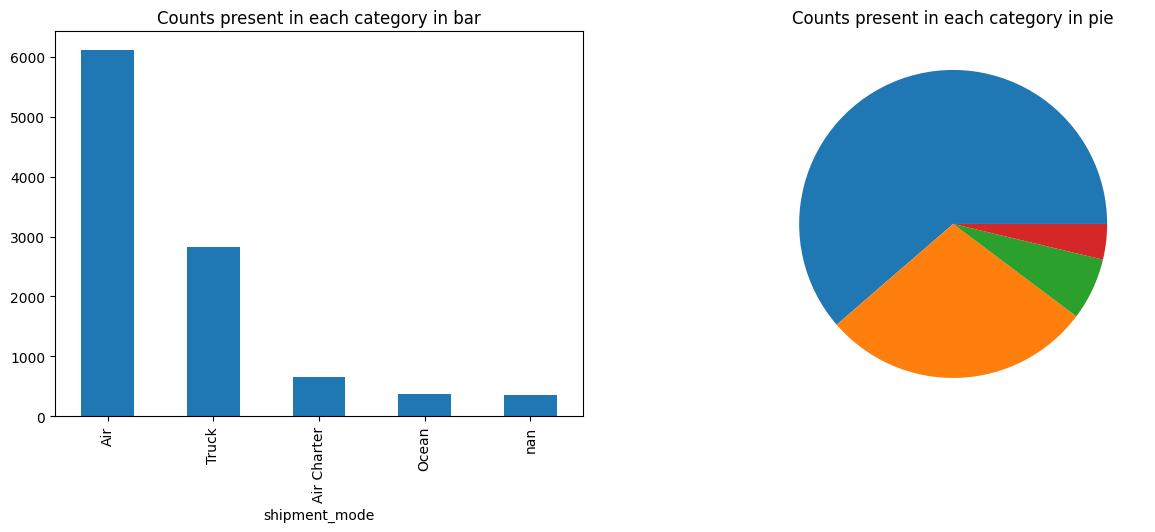

In [36]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(121)
data["shipment_mode"].value_counts(dropna=False).plot.bar()
plt.title("Counts present in each category in bar")

ax1=fig.add_subplot(122)
plt.pie(data["shipment_mode"].value_counts())
plt.title("Counts present in each category in pie")
plt.show()


Top 10 Countries Wise Count 

country
South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Name: count, dtype: int64


Text(0.5, 0, 'Country Name')

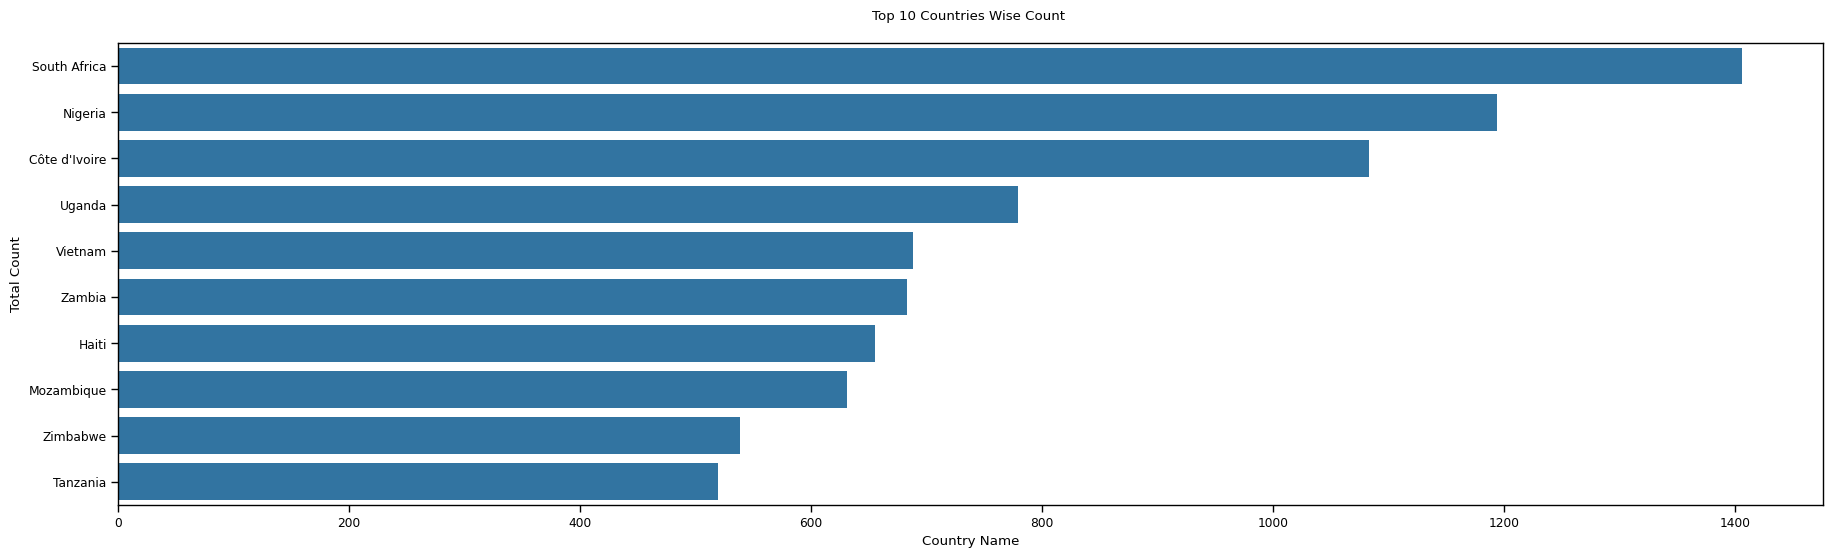

In [37]:
DataSet = data.dropna()
ItemCount = data["country"].value_counts().nlargest(10)
print("Top 10 Countries Wise Count \n")
print(ItemCount)
sns.set_context("paper",font_scale=1)
plt.figure(figsize=(22,6))
sns.countplot(data['country'],order = data['country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

Total Pack Price for Top 15 Countries

country
Nigeria          2.014273e+08
Zambia           1.388966e+08
Côte d'Ivoire    1.015227e+08
Mozambique       9.506688e+07
South Africa     8.670115e+07
Tanzania         8.348324e+07
Zimbabwe         7.150396e+07
Uganda           7.057889e+07
Vietnam          5.468303e+07
Rwanda           5.402315e+07
Haiti            3.881815e+07
Kenya            2.287998e+07
Ethiopia         1.746067e+07
Cameroon         1.191346e+07
Ghana            6.215921e+06
Name: line_item_value, dtype: float64


Text(0.5, 0, 'Country Name')

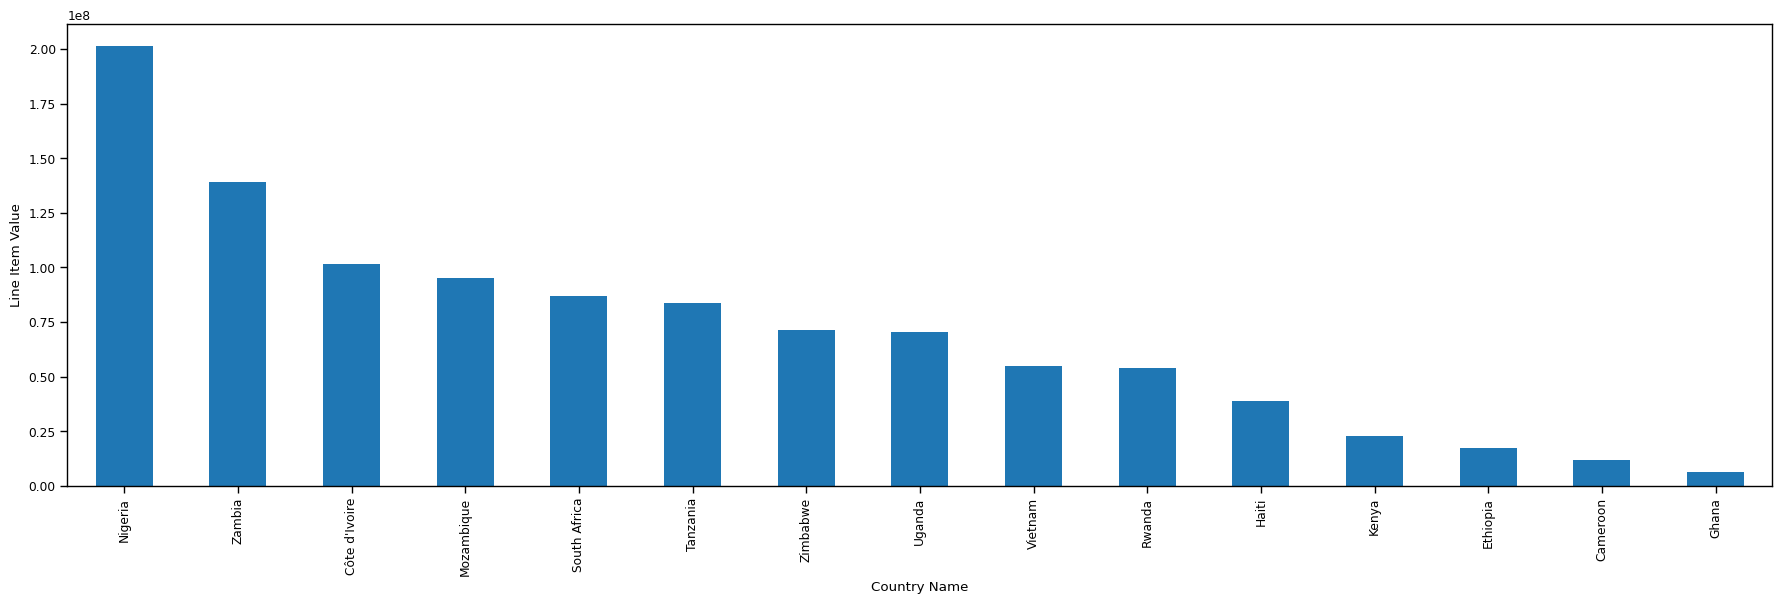

In [38]:
TotalPrice = data.groupby(['country'])['line_item_value'].sum().nlargest(15)
print("Total Pack Price for Top 15 Countries\n")
print(TotalPrice)
plt.figure(figsize=(22,6))
GraphData=data.groupby(['country'])['line_item_value'].sum().nlargest(15)
GraphData.plot(kind='bar')
plt.ylabel('Line Item Value')
plt.xlabel('Country Name')

In [39]:
data.columns

Index(['unit_of_measure_(per_pack)', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'line_item_insurance_(usd)', 'project_code',
       'pq_#', 'po_/_so_#', 'asn/dn_#', 'country', 'managed_by', 'fulfill_via',
       'vendor_inco_term', 'shipment_mode', 'pq_first_sent_to_client_date',
       'po_sent_to_vendor_date', 'scheduled_delivery_date',
       'delivered_to_client_date', 'delivery_recorded_date', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule/test_type', 'brand', 'dosage', 'dosage_form',
       'manufacturing_site', 'first_line_designation', 'weight_(kilograms)',
       'freight_cost_(usd)'],
      dtype='object')

In [40]:
data.head()

unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                        30.0                19.0            551.0   
1                       180.0              1000.0           6200.0   
2                       100.0               500.0          40000.0   
3                        60.0             31920.0         127360.8   
4                        60.0             38000.0         121600.0   

   pack_price  unit_price  line_item_insurance_(usd) project_code  \
0    29.00000        0.97                      47.04   100-CI-T01   
1     6.20000        0.03                      47.04   108-VN-T01   
2    52.80125        0.80                      47.04   100-CI-T01   
3     3.99000        0.07                      47.04   108-VN-T01   
4     3.20000        0.05                      47.04   108-VN-T01   

             pq_# po_/_so_# asn/dn_#  ...  \
0  Pre-PQ Process    SCMS-4    ASN-8  ...   
1  Pre-PQ Process   SCMS-13   ASN-85  ...   
2  Pre-PQ Process   SCMS-20   ASN-14  ...   
3  Pre-PQ Process   SCMS-78   ASN-50  ...   
4  Pre-PQ Process   SCMS-81   ASN-55  ...   

                                              vendor  \
0                        RANBAXY Fine Chemicals LTD.   
1                           Aurobindo Pharma Limited   
2                               Abbott GmbH & Co. KG   
3  SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...   
4                           Aurobindo Pharma Limited   

                                    item_description  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...   
1  Nevirapine 10mg/ml, oral suspension, Bottle, 2...   
2     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3                 Lamivudine 150mg, tablets, 60 Tabs   
4                  Stavudine 30mg, capsules, 60 Caps   

                         molecule/test_type      brand   dosage  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test     Reveal      NaN   
1                                Nevirapine    Generic  10mg/ml   
2       HIV 1/2, Determine Complete HIV Kit  Determine      NaN   
3                                Lamivudine    Generic    150mg   
4                                 Stavudine    Generic     30mg   

       dosage_form             manufacturing_site first_line_designation  \
0         Test kit     Ranbaxy Fine Chemicals LTD                    Yes   
1  Oral suspension      Aurobindo Unit III, India                    Yes   
2         Test kit  ABBVIE GmbH & Co.KG Wiesbaden                    Yes   
3           Tablet  Ranbaxy, Paonta Shahib, India                    Yes   
4          Capsule      Aurobindo Unit III, India                    Yes   

  weight_(kilograms) freight_cost_(usd)  
0                 13             780.34  
1                358             4521.5  
2                171            1653.78  
3               1855           16007.06  
4               7590           45450.08  

[5 rows x 32 columns]

In [41]:
data["freight_cost_(usd)"].value_counts()

freight_cost_(usd)
Freight Included in Commodity Cost    1442
Invoiced Separately                    239
9736.1                                  36
6147.18                                 27
13398.06                                16
                                      ... 
749.36                                   1
7060.97                                  1
7616.19                                  1
12793.7                                  1
See DN-4282 (ID#:83919)                  1
Name: count, Length: 6733, dtype: int64

In [49]:
def trans_freight_cost(x):
    if x.find("See")!=-1:
        return np.nan
    elif x=="Freight Included in Commodity Cost" or x=="Invoiced Separately":
        return 0
    else:
        return x

In [50]:

data["freight_cost_(usd)"]=data["freight_cost_(usd)"].apply(trans_freight_cost)

NameError: name 'data' is not defined

In [44]:
data["freight_cost_(usd)"].value_counts()

freight_cost_(usd)
0           1681
9736.1        36
6147.18       27
7445.8        16
13398.06      16
            ... 
52057.8        1
4312.92        1
25129.15       1
4138.11        1
3410           1
Name: count, Length: 5433, dtype: int64

In [45]:
data.isna().sum()

unit_of_measure_(per_pack)         0
line_item_quantity                 0
line_item_value                    0
pack_price                         0
unit_price                         0
line_item_insurance_(usd)          0
project_code                       0
pq_#                               0
po_/_so_#                          0
asn/dn_#                           0
country                            0
managed_by                         0
fulfill_via                        0
vendor_inco_term                   0
shipment_mode                    360
pq_first_sent_to_client_date       0
po_sent_to_vendor_date             0
scheduled_delivery_date            0
delivered_to_client_date           0
delivery_recorded_date             0
product_group                      0
sub_classification                 0
vendor                             0
item_description                   0
molecule/test_type                 0
brand                              0
dosage                          1736
d

In [46]:
median_value=data["freight_cost_(usd)"].median()
data["freight_cost_(usd)"]=data["freight_cost_(usd)"].replace(np.nan,median_value)
data["freight_cost_(usd)"]

0          780.34
1          4521.5
2         1653.78
3        16007.06
4        45450.08
           ...   
10319     3549.77
10320     3549.77
10321           0
10322           0
10323           0
Name: freight_cost_(usd), Length: 10324, dtype: object

In [47]:
data["freight_cost_(usd)"]=data["freight_cost_(usd)"].astype("float")

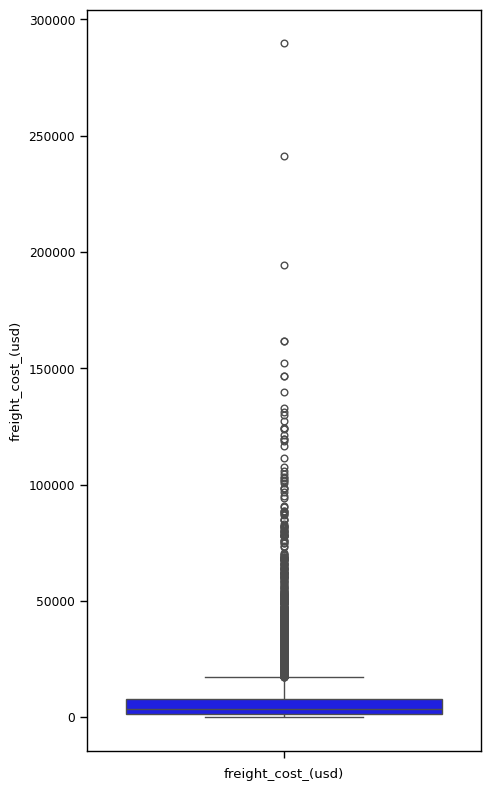

In [48]:
plt.figure(figsize=(5,8))
sns.boxplot(data["freight_cost_(usd)"], color='blue')
plt.xlabel("freight_cost_(usd)")
plt.tight_layout()

In [49]:
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = data[col].quantile(0.25)
    percentile75 = data[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    data[col] = np.where(data[col]>upper_limit, upper_limit, np.where(data[col]<lower_limit,lower_limit,data[col]))
    return data[col]


In [50]:
data["freight_cost_(usd)"]=remove_outliers_IQR("freight_cost_(usd)")

percentile25 1243.5675
percentile75 7707.64
Upper limit 17403.74875
Lower limit -8452.541249999998


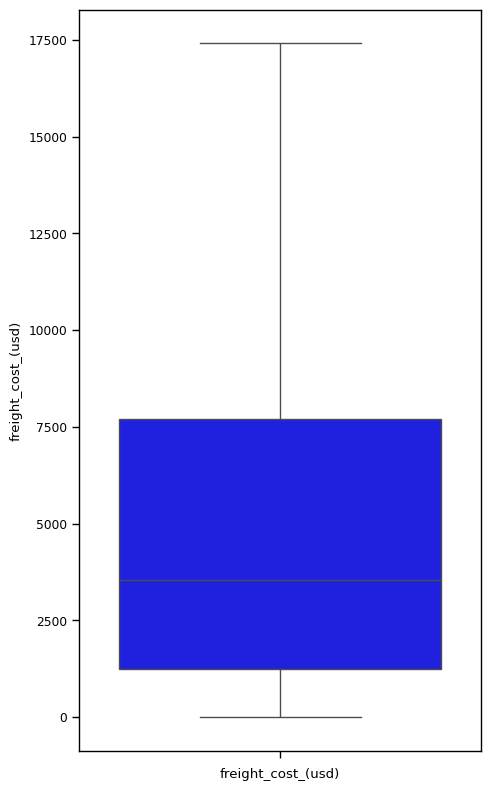

In [51]:
plt.figure(figsize=(5,8))
sns.boxplot(data["freight_cost_(usd)"], color='blue')
plt.xlabel("freight_cost_(usd)")
plt.tight_layout()

In [52]:
data.isnull().sum()

unit_of_measure_(per_pack)         0
line_item_quantity                 0
line_item_value                    0
pack_price                         0
unit_price                         0
line_item_insurance_(usd)          0
project_code                       0
pq_#                               0
po_/_so_#                          0
asn/dn_#                           0
country                            0
managed_by                         0
fulfill_via                        0
vendor_inco_term                   0
shipment_mode                    360
pq_first_sent_to_client_date       0
po_sent_to_vendor_date             0
scheduled_delivery_date            0
delivered_to_client_date           0
delivery_recorded_date             0
product_group                      0
sub_classification                 0
vendor                             0
item_description                   0
molecule/test_type                 0
brand                              0
dosage                          1736
d

In [53]:
data.drop("project_code",axis=1,inplace=True)

In [54]:

def plot(data,col_name):
    fig=plt.figure(figsize=(15,5))
    ax0=fig.add_subplot(121)
    data.value_counts().plot.bar()
    plt.title("bar plot for {} column".format(col_name))
    
    ax1=fig.add_subplot(122)
    data.value_counts().plot.pie()
    plt.title("pie chart for {} column".format(col_name))
    plt.show()

In [55]:
data.drop("managed_by",axis=1,inplace=True)

In [56]:
data["po_/_so_#"].value_counts()

po_/_so_#
SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-215370    38
SCMS-259075    38
               ..
SCMS-260830     1
SCMS-283040     1
SCMS-149030     1
SCMS-234070     1
SO-51680        1
Name: count, Length: 6233, dtype: int64

In [57]:
data["pq_#"].value_counts()

pq_#
Pre-PQ Process    2681
FPQ-14942          205
FPQ-12522          154
FPQ-13973          110
FPQ-4537            98
                  ... 
FPQ-12933            1
FPQ-6823             1
FPQ-15736            1
FPQ-6128             1
FPQ-16523            1
Name: count, Length: 1237, dtype: int64

In [58]:
data["asn/dn_#"].value_counts()

asn/dn_#
ASN-19166    54
ASN-24415    38
ASN-23875    26
ASN-32138    19
ASN-28034    17
             ..
ASN-11200     1
ASN-23000     1
ASN-19497     1
ASN-24569     1
DN-4334       1
Name: count, Length: 7030, dtype: int64

In [59]:
data.isnull().sum()

unit_of_measure_(per_pack)         0
line_item_quantity                 0
line_item_value                    0
pack_price                         0
unit_price                         0
line_item_insurance_(usd)          0
pq_#                               0
po_/_so_#                          0
asn/dn_#                           0
country                            0
fulfill_via                        0
vendor_inco_term                   0
shipment_mode                    360
pq_first_sent_to_client_date       0
po_sent_to_vendor_date             0
scheduled_delivery_date            0
delivered_to_client_date           0
delivery_recorded_date             0
product_group                      0
sub_classification                 0
vendor                             0
item_description                   0
molecule/test_type                 0
brand                              0
dosage                          1736
dosage_form                        0
manufacturing_site                 0
f

In [60]:
data["fulfill_via"].value_counts()

fulfill_via
From RDC       5404
Direct Drop    4920
Name: count, dtype: int64

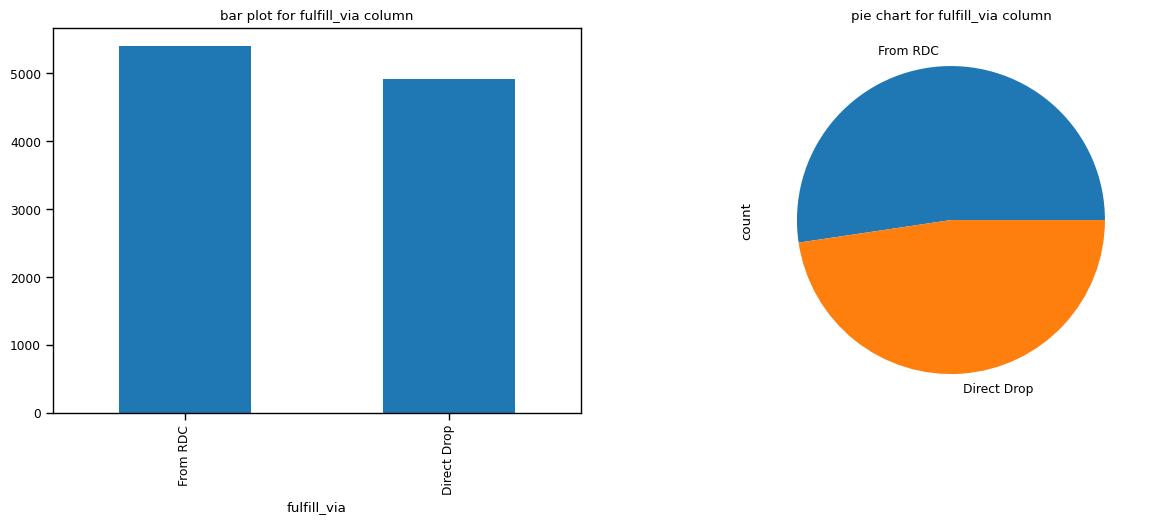

In [61]:
plot(data["fulfill_via"], "fulfill_via")

In [62]:

data.drop("pq_#",axis=1,inplace=True)



In [63]:
data.drop("po_/_so_#",axis=1,inplace=True)

In [64]:
data["vendor_inco_term"].value_counts()

vendor_inco_term
N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: count, dtype: int64

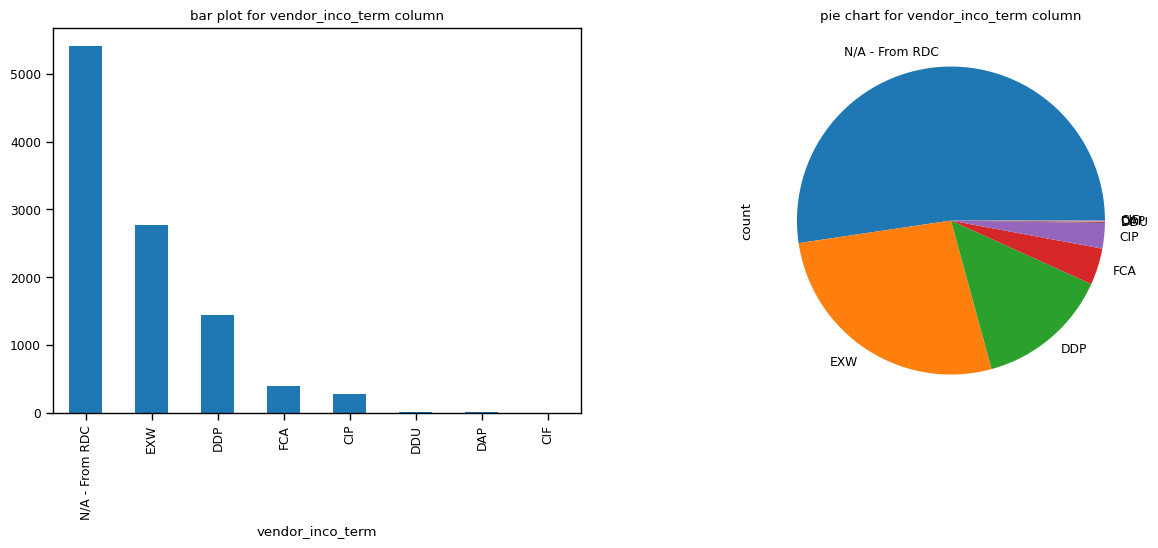

In [65]:
plot(data["vendor_inco_term"], "vendor_inco_term")

In [66]:
mode_value = data["shipment_mode"].mode()[0]
# Replace NaN values with the mode value
data["shipment_mode"] = data["shipment_mode"].replace(np.nan, mode_value)


In [67]:
data.drop("weight_(kilograms)",axis=1,inplace=True)

In [68]:
data.isnull().sum()

unit_of_measure_(per_pack)         0
line_item_quantity                 0
line_item_value                    0
pack_price                         0
unit_price                         0
line_item_insurance_(usd)          0
asn/dn_#                           0
country                            0
fulfill_via                        0
vendor_inco_term                   0
shipment_mode                      0
pq_first_sent_to_client_date       0
po_sent_to_vendor_date             0
scheduled_delivery_date            0
delivered_to_client_date           0
delivery_recorded_date             0
product_group                      0
sub_classification                 0
vendor                             0
item_description                   0
molecule/test_type                 0
brand                              0
dosage                          1736
dosage_form                        0
manufacturing_site                 0
first_line_designation             0
freight_cost_(usd)                 0
d

In [69]:
def client_dates(date):
    if date=="Pre-PQ Process":
        return pd.to_datetime('01/06/2009',format="%d/%m/%Y")
    elif date=="Date Not Captured":
        return "Date Not Captured"
    else:
        if len(date)<9:
            date=pd.to_datetime(date,format="%m/%d/%y")
            return date
        else:
            date=date.replace("-","/")
            date=pd.to_datetime(date,format="%d/%m/%Y")
            return date

In [70]:
data["pq_first_sent_to_client_date"]=data["pq_first_sent_to_client_date"].apply(client_dates)

In [71]:
data["pq_first_sent_to_client_date"].value_counts()


pq_first_sent_to_client_date
2009-06-01 00:00:00    2476
Date Not Captured       205
2014-09-11 00:00:00     205
2013-07-11 00:00:00     173
2014-04-30 00:00:00     123
                       ... 
2010-07-29 00:00:00       1
2011-10-03 00:00:00       1
2013-12-17 00:00:00       1
2015-02-05 00:00:00       1
2013-08-29 00:00:00       1
Name: count, Length: 765, dtype: int64

In [72]:
data.drop(data.index[data["pq_first_sent_to_client_date"]=="Date Not Captured"],inplace=True)

In [73]:
data["pq_first_sent_to_client_date"].value_counts()

pq_first_sent_to_client_date
2009-06-01    2476
2014-09-11     205
2013-07-11     173
2014-04-30     123
2009-11-06      98
              ... 
2013-07-02       1
2010-09-21       1
2014-08-04       1
2012-11-07       1
2013-08-29       1
Name: count, Length: 764, dtype: int64

In [74]:
data["po_sent_to_vendor_date"].value_counts()

po_sent_to_vendor_date
N/A - From RDC       5199
Date Not Captured     328
8/27/14                80
3/19/10                78
8/29/14                76
                     ... 
5/18/15                 1
2/10/14                 1
10/16/13                1
12/9/11                 1
8/29/12                 1
Name: count, Length: 897, dtype: int64

In [75]:
data.drop('po_sent_to_vendor_date', axis= 1,inplace=True)

In [76]:
data["scheduled_delivery_date"].value_counts()

scheduled_delivery_date
29-Aug-14    97
16-Mar-12    83
27-Aug-14    63
31-May-10    62
31-Jan-14    60
             ..
4-Apr-15      1
5-Jan-15      1
20-Jun-15     1
24-Apr-14     1
9-Sep-15      1
Name: count, Length: 1994, dtype: int64

In [77]:
def transform_date(data):
    data=data.replace("-","/")
    data=pd.to_datetime(data,format="%d/%b/%y")
    return data

In [78]:
data["scheduled_delivery_date"]=data["scheduled_delivery_date"].apply(transform_date)

In [79]:
data["scheduled_delivery_date"].value_counts()

scheduled_delivery_date
2014-08-29    97
2012-03-16    83
2014-08-27    63
2010-05-31    62
2014-01-31    60
              ..
2015-04-04     1
2015-01-05     1
2015-06-20     1
2014-04-24     1
2015-09-09     1
Name: count, Length: 1994, dtype: int64

In [80]:
data["delivery_recorded_date"]=data["delivery_recorded_date"].apply(transform_date)

In [81]:
data["delivered_to_client_date"].value_counts()


delivered_to_client_date
29-Aug-14    74
27-Aug-14    66
28-Jun-10    60
14-Feb-12    60
16-Apr-13    59
             ..
8-Sep-15      1
13-Dec-14     1
12-Jun-10     1
9-Aug-12      1
16-Apr-15     1
Name: count, Length: 2077, dtype: int64

In [82]:



data["delivery_recorded_date"] = pd.to_datetime(data["delivery_recorded_date"], errors='coerce')
data["pq_first_sent_to_client_date"] = pd.to_datetime(data["pq_first_sent_to_client_date"], errors='coerce')

data["days_to_process"] = data["delivery_recorded_date"] - data["pq_first_sent_to_client_date"]


In [83]:
data["days_to_process"].isnull().sum()

0

In [84]:
data["days_to_process"] = pd.to_numeric(data["days_to_process"].astype(str).str.replace(" days", ""), errors="coerce")


<Axes: ylabel='days_to_process'>

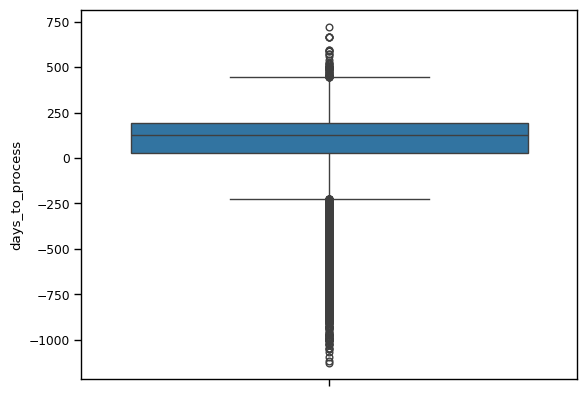

In [85]:
sns.boxplot(data["days_to_process"])

In [86]:
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = data[col].quantile(0.25)
    percentile75 = data[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    data[col] = np.where(data[col]>upper_limit, upper_limit, np.where(data[col]<lower_limit,lower_limit,data[col]))
    return data[col]

In [87]:
remove_outliers_IQR("days_to_process")

percentile25 27.0
percentile75 194.0
Upper limit 444.5
Lower limit -223.5


0       -223.5
1       -223.5
2       -223.5
3       -223.5
4       -223.5
         ...  
10319    277.0
10320    287.0
10321    387.0
10322     41.0
10323    299.0
Name: days_to_process, Length: 10119, dtype: float64

<Axes: ylabel='days_to_process'>

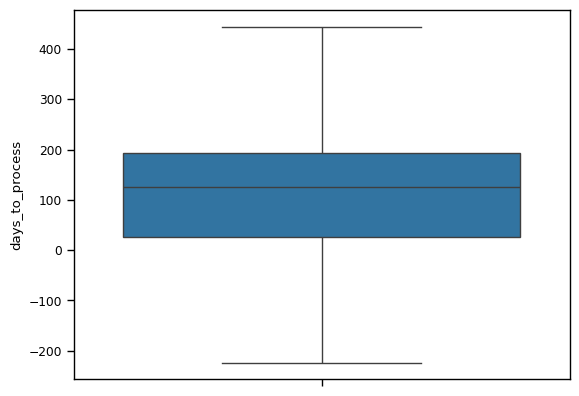

In [88]:
sns.boxplot(data["days_to_process"])

Selection of independent features based on the description of the datasets provided in the site.
https://data.usaid.gov/HIV-AIDS/Supply-Chain-Shipment-Pricing-Data/a3rc-nmf6

In [89]:
data.drop('pq_first_sent_to_client_date', axis= 1,inplace=True)

In [90]:
data.drop('scheduled_delivery_date', axis= 1,inplace=True)
data.drop('delivered_to_client_date', axis= 1,inplace=True)
data.drop("delivery_recorded_date", axis=1, inplace=True)

In [91]:
data['product_group'].unique()

array(['HRDT', 'ARV', 'ACT', 'MRDT', 'ANTM'], dtype=object)

In [92]:
data.drop("product_group", axis=1, inplace=True)

In [93]:
data.drop("sub_classification", axis=1, inplace=True)

In [94]:
data.drop("molecule/test_type", axis=1, inplace=True)
data.drop("item_description", axis=1, inplace=True)
data.drop("vendor", axis=1, inplace=True)

In [95]:
data.drop("brand", axis=1, inplace=True)

In [96]:
data.drop("dosage", axis=1, inplace=True)

In [97]:
data.drop("dosage_form", axis=1, inplace=True)

<Axes: xlabel='manufacturing_site'>

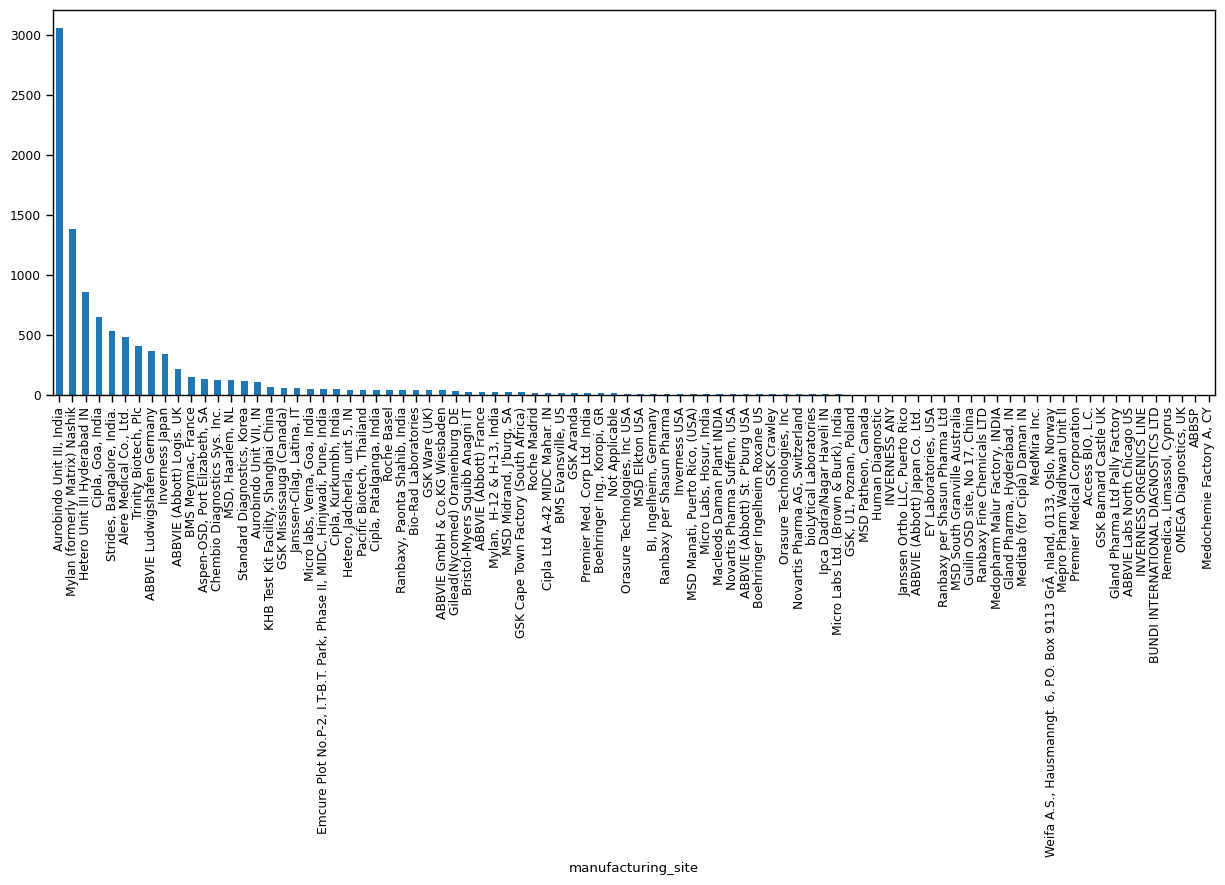

In [98]:
plt.figure(figsize=(15,5))
data["manufacturing_site"].value_counts().plot.bar()

In [99]:

data.drop("manufacturing_site", axis=1, inplace=True)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10119 entries, 0 to 10323
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   unit_of_measure_(per_pack)  10119 non-null  float64
 1   line_item_quantity          10119 non-null  float64
 2   line_item_value             10119 non-null  float64
 3   pack_price                  10119 non-null  float64
 4   unit_price                  10119 non-null  float64
 5   line_item_insurance_(usd)   10119 non-null  float64
 6   asn/dn_#                    10119 non-null  object 
 7   country                     10119 non-null  object 
 8   fulfill_via                 10119 non-null  object 
 9   vendor_inco_term            10119 non-null  object 
 10  shipment_mode               10119 non-null  object 
 11  first_line_designation      10119 non-null  object 
 12  freight_cost_(usd)          10119 non-null  float64
 13  days_to_process             10119 no

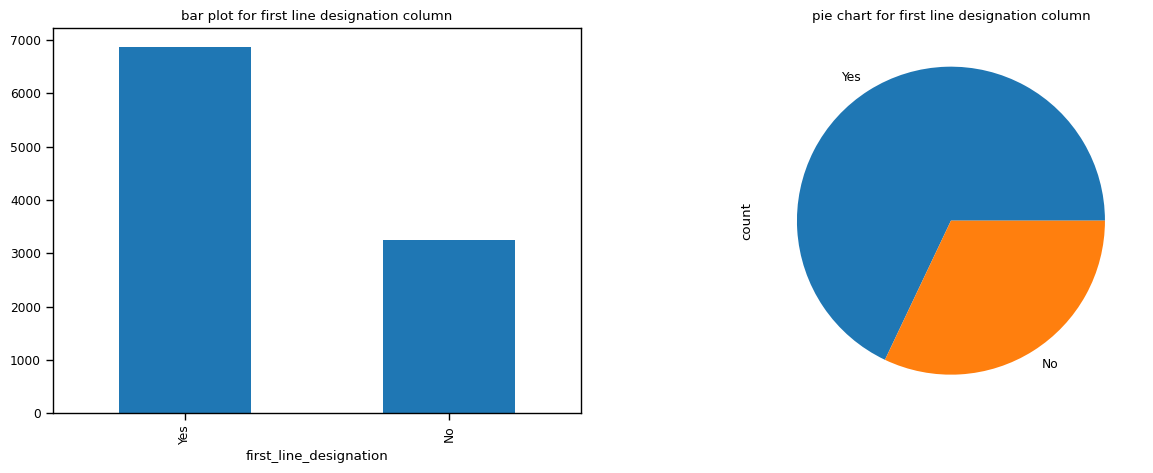

In [101]:
plot(data["first_line_designation"],"first line designation")

In [102]:
data['asn/dn_#'].unique()

array(['ASN-8', 'ASN-85', 'ASN-14', ..., 'DN-4276', 'DN-4279', 'DN-4334'],
      dtype=object)

In [103]:
def reorder(data):
    data_split=data.split("-")
    data_return=data_split[0]
    return data_return

In [104]:
data["asn/dn_#"]=data["asn/dn_#"].apply(reorder)

In [105]:
data["asn/dn_#"].unique()

array(['ASN', 'DN'], dtype=object)

In [106]:
cat_col=[x for x in data.columns if data[x].dtypes=="O"]

In [107]:
cat_col

['asn/dn_#',
 'country',
 'fulfill_via',
 'vendor_inco_term',
 'shipment_mode',
 'first_line_designation']

In [108]:
num_col=[y for y in data.columns if data[y].dtypes=="int64" or data[y].dtypes=="float64"]



In [109]:
num_col

['unit_of_measure_(per_pack)',
 'line_item_quantity',
 'line_item_value',
 'pack_price',
 'unit_price',
 'line_item_insurance_(usd)',
 'freight_cost_(usd)',
 'days_to_process']

Plot of the outlier removed nuerical data

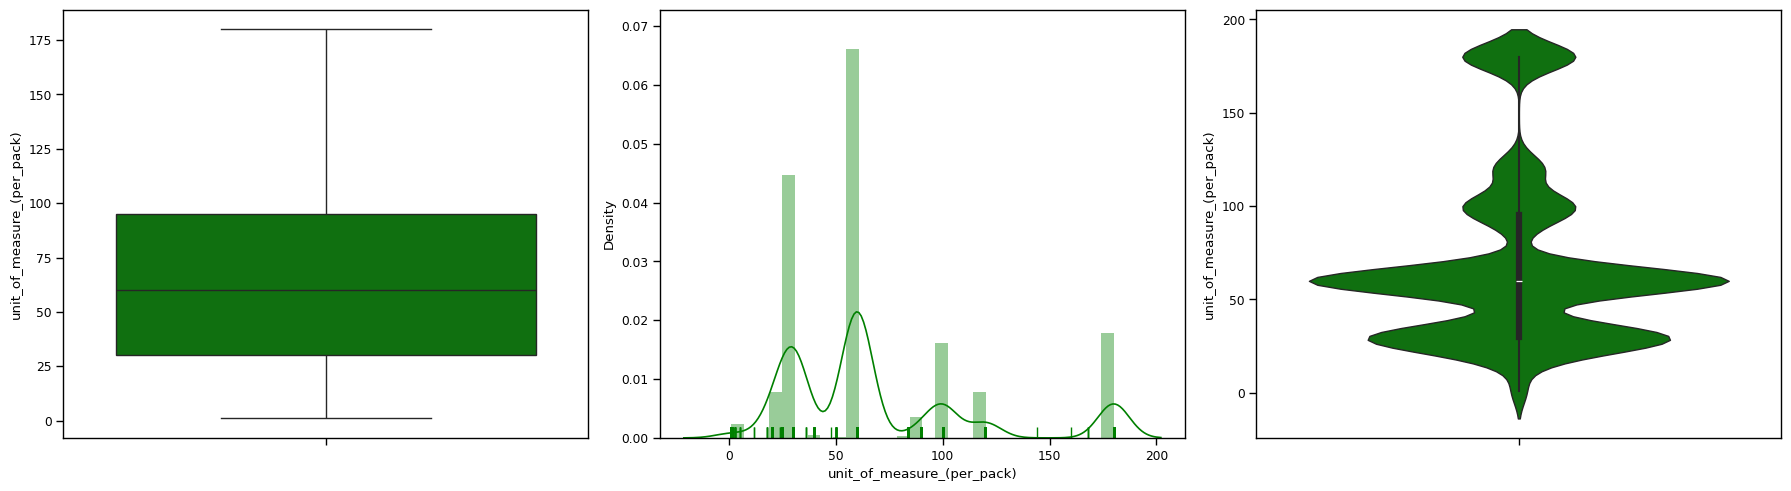

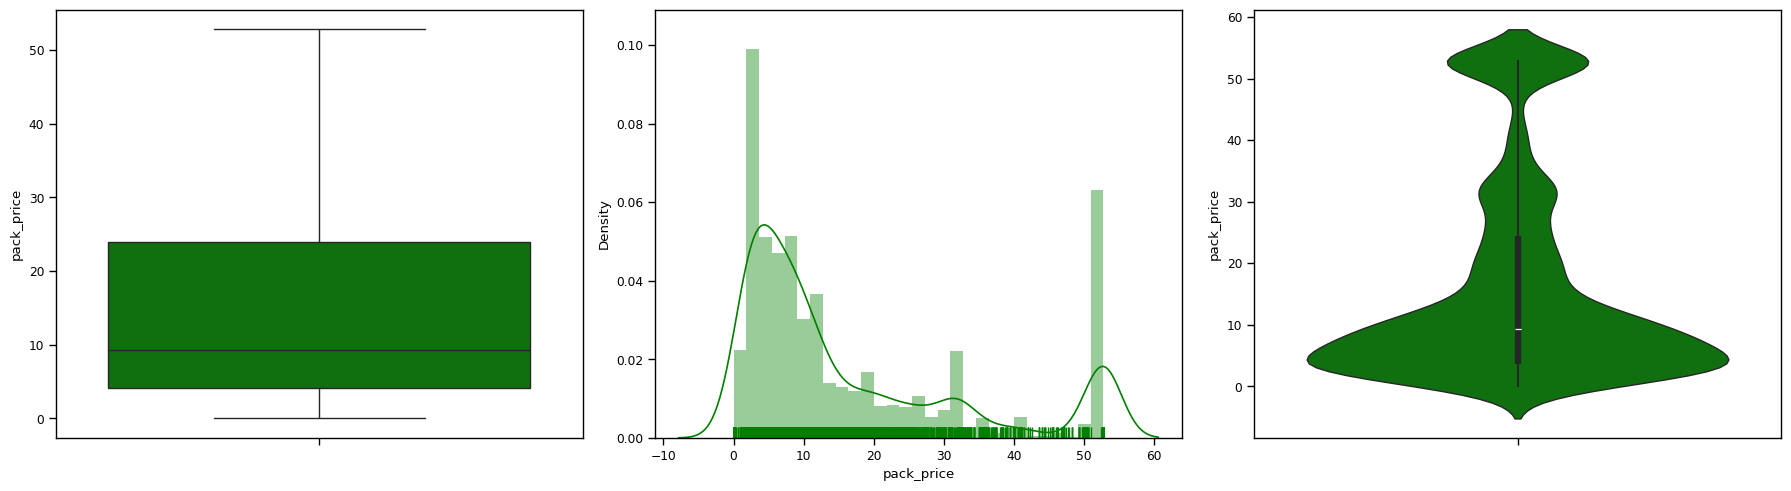

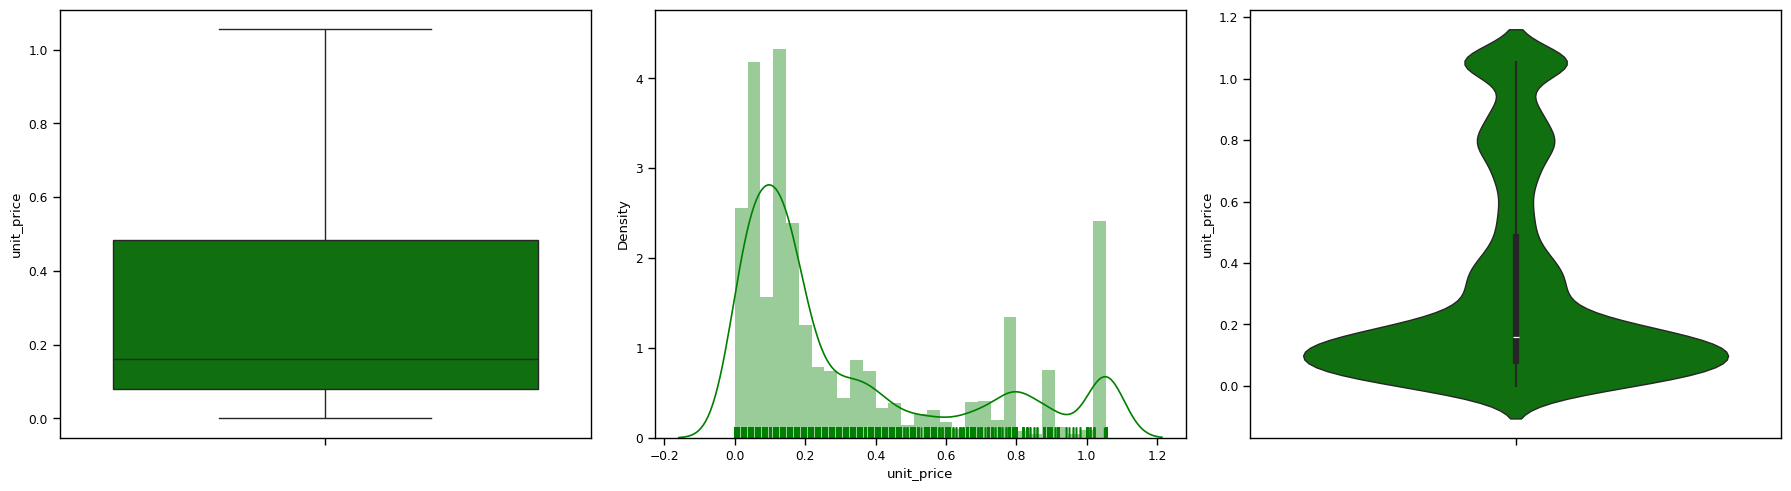

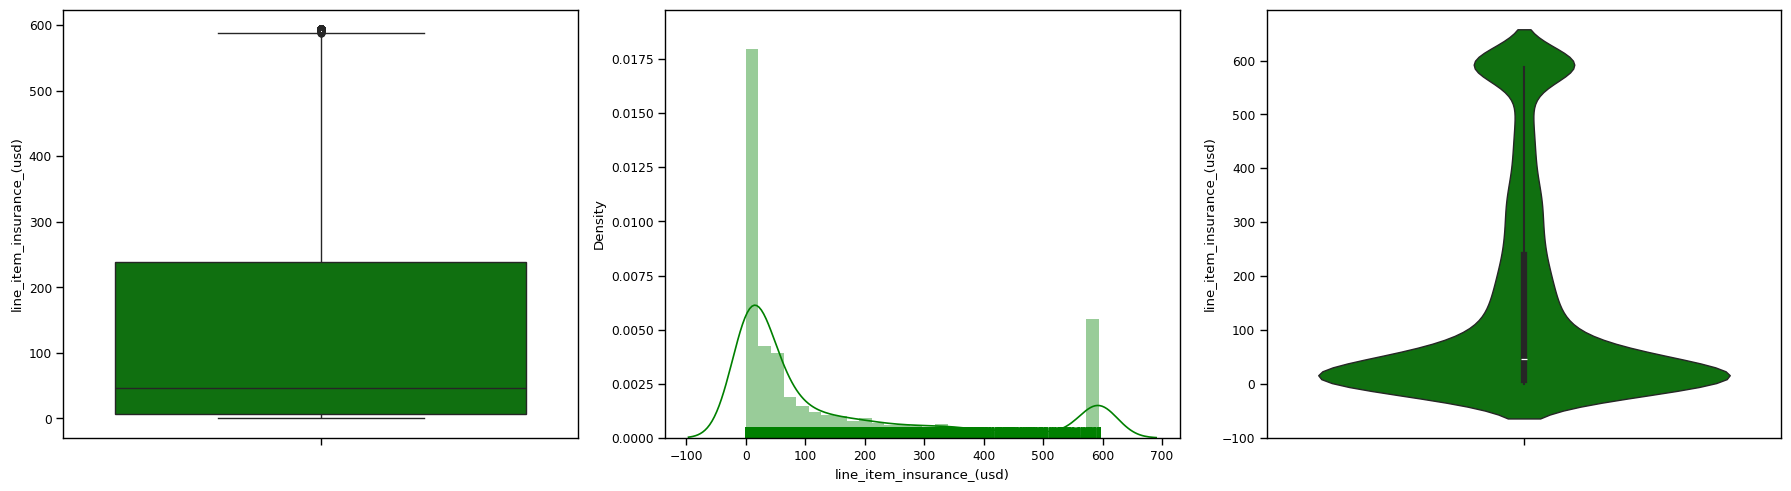

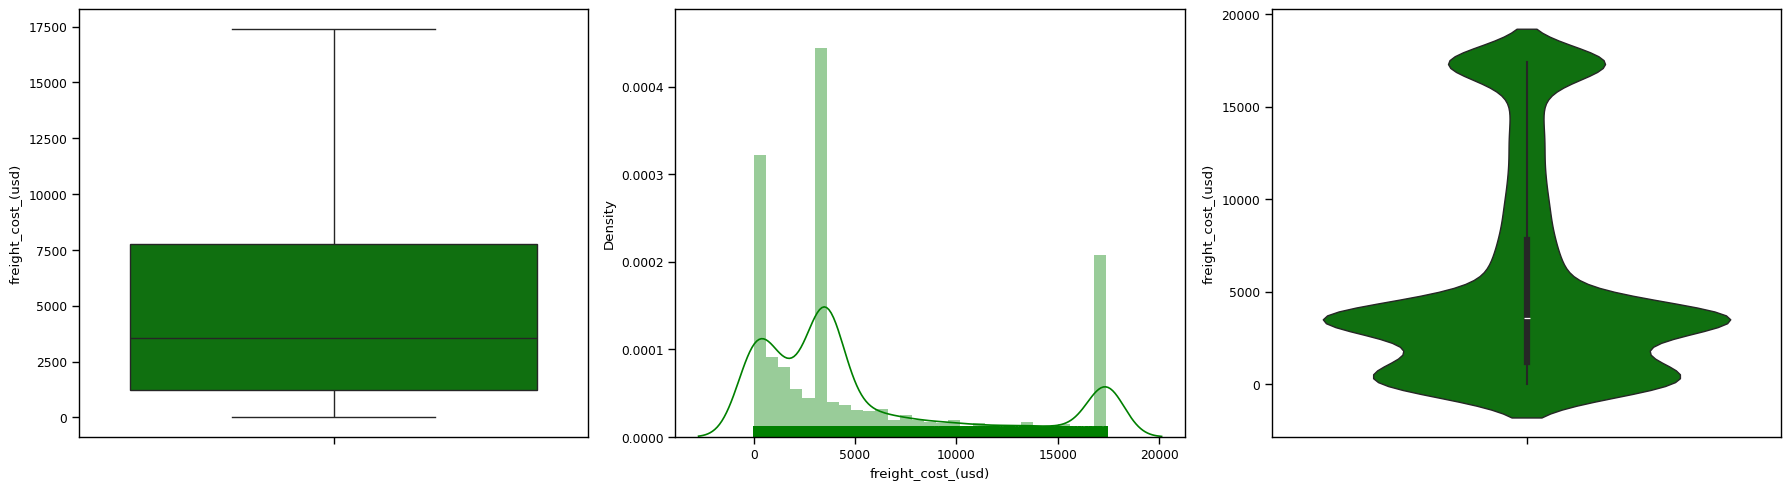

In [110]:
num=data[num_col]
for i in enumerate(num_col):
    f = plt.figure(figsize=(18,5))
    ax = f.add_subplot(131)
    sns.boxplot(num[i[1]], color= 'Green')

    ax1 = f.add_subplot(132)
    sns.distplot(num[i[1]], rug = True,  color= 'Green',kde=True)
    
    ax2 = f.add_subplot(133)
    sns.violinplot(num[i[1]], orient= 'vertical',  color= 'Green')
    plt.tight_layout()
    plt.show()

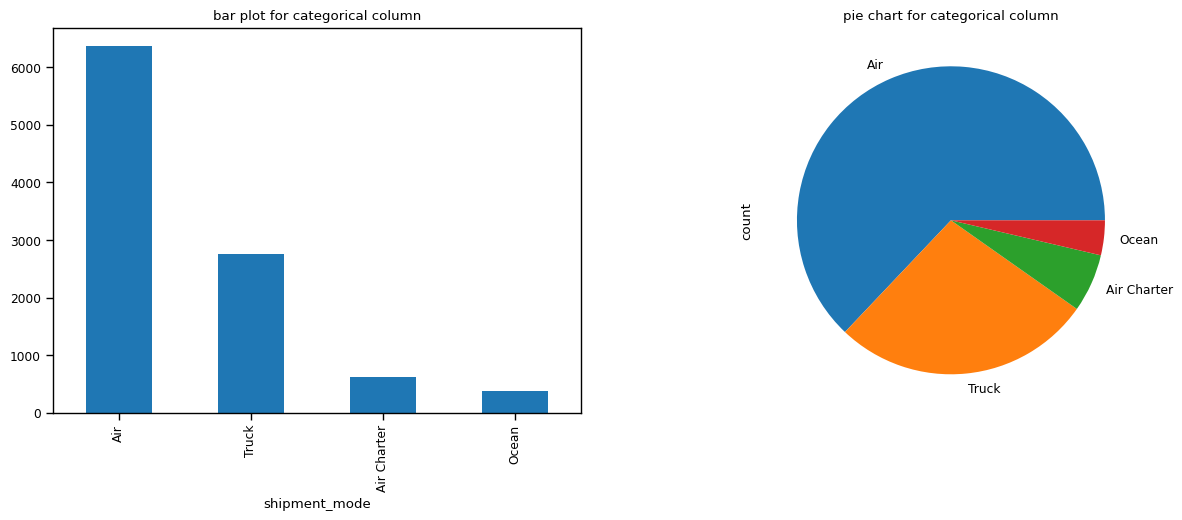

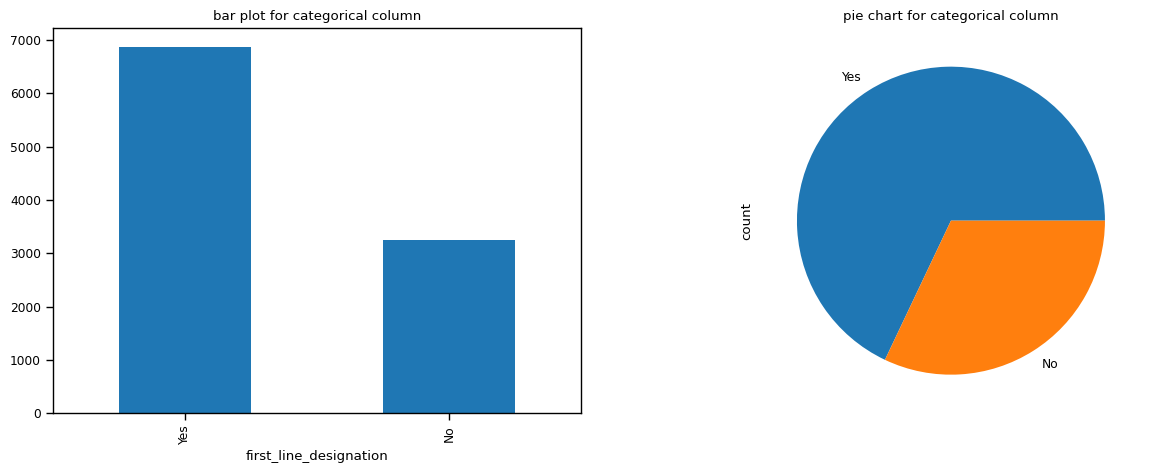

In [111]:
cat=data[cat_col]
for i in enumerate(cat_col):
    plot(cat[i[1]],"categorical")

Multivariate anlysis on selected features

In [112]:
data["shipment_mode"].unique()

array(['Air', 'Truck', 'Air Charter', 'Ocean'], dtype=object)

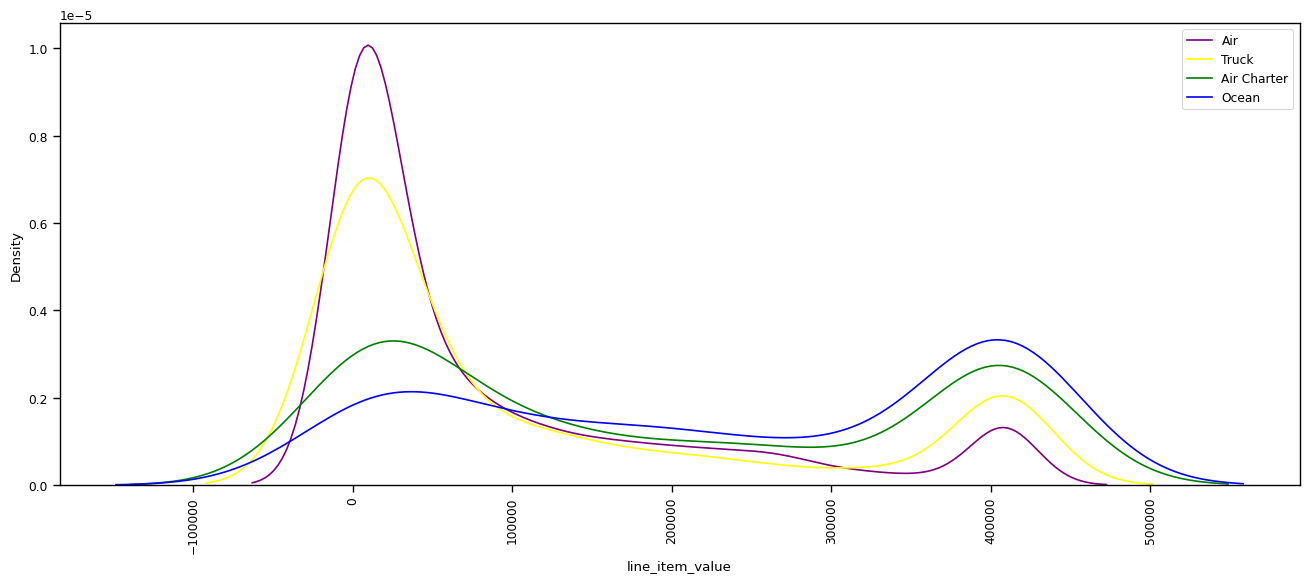

In [113]:
fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.kdeplot(data[data['shipment_mode']=='Air']['line_item_value'], color='purple', ax=ax, label='Air')
sns.kdeplot(data[data['shipment_mode']=='Truck']['line_item_value'], color='yellow', ax=ax, label='Truck')
sns.kdeplot(data[data['shipment_mode']=='Air Charter']['line_item_value'], color='green', ax=ax, label='Air Charter')
sns.kdeplot(data[data['shipment_mode']=='Ocean']['line_item_value'], color='blue', ax=ax, label='Ocean')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


In [111]:
import plotly.express as px


No linear realtionship between line_item_value and freight_cost_(usd)

In [ ]:

fig, ax = plt.subplots(2, 2, figsize=(14, 12))
sns.boxplot(x='shipment_mode', y='line_item_value', data=data, ax=ax[0][0])
sns.stripplot(x='shipment_mode', y='line_item_value', data=data, ax=ax[0][1], alpha=0.5)
sns.swarmplot(x='shipment_mode', y='line_item_value', data=data, ax=ax[1][0], alpha=0.7)
sns.boxplot(x='shipment_mode', y='line_item_value', data=data, ax=ax[1][1])
sns.stripplot(x='shipment_mode', y='line_item_value', data=data, ax=ax[1][1], alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
fig = px.box(data, x='shipment_mode', y='line_item_value', points="all")
fig.show()

In [ ]:
fig = px.violin(data, x="shipment_mode", y="line_item_value")
fig.show()

In [ ]:
catcol=data[cat_col]
for i in enumerate(cat_col):
    fig=plt.figure(figsize=(15,5))
    ax = fig.add_subplot(131)
    sns.boxplot(x= catcol[i[1]], y= data["line_item_value"])
    plt.xticks(rotation=90)
    
    ax1 = fig.add_subplot(132)
    sns.barplot(x = catcol[i[1]], y= data['line_item_value'])
    plt.xticks(rotation=90)
    
    fig2 = fig.add_subplot(133)
    sns.violinplot(x = catcol[i[1]], y= data['line_item_value'])
    plt.xticks(rotation=90)
    plt.show()

In [133]:
for col in num_col:
    fig = plt.figure(figsize=(25, 10))
    scatter_plot = px.scatter(data, x=col, y=data["line_item_value"])
    scatter_plot.show()

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10119 entries, 0 to 10323
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   unit_of_measure_(per_pack)  10119 non-null  float64
 1   line_item_quantity          10119 non-null  float64
 2   line_item_value             10119 non-null  float64
 3   pack_price                  10119 non-null  float64
 4   unit_price                  10119 non-null  float64
 5   line_item_insurance_(usd)   10119 non-null  float64
 6   asn/dn_#                    10119 non-null  object 
 7   country                     10119 non-null  object 
 8   fulfill_via                 10119 non-null  object 
 9   vendor_inco_term            10119 non-null  object 
 10  shipment_mode               10119 non-null  object 
 11  first_line_designation      10119 non-null  object 
 12  freight_cost_(usd)          10119 non-null  float64
 13  days_to_process             10119 no

In [115]:
data["asn/dn_#"].value_counts()

asn/dn_#
DN     5199
ASN    4920
Name: count, dtype: int64

In [116]:
data["asn/dn_#"].value_counts()
data["asn/dn_#"]=pd.get_dummies(data["asn/dn_#"],drop_first=True)

In [137]:
data["country"].value_counts()

South Africa          1406
Nigeria               1161
Côte d'Ivoire         1046
Uganda                 754
Vietnam                688
Zambia                 650
Haiti                  640
Mozambique             608
Zimbabwe               535
Tanzania               512
Rwanda                 429
Congo, DRC             333
Guyana                 237
Ethiopia               207
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 94
Cameroon                75
Botswana                70
Dominican Republic      52
Ghana                   48
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Libya                    8
Angola                   7
Liberia                  6
Sierra Leone             4
Lesotho                  4
Senegal                  3
Togo                     3
Afghanistan              3
K

In [117]:
data["country"].value_counts()
frequency=data["country"].value_counts().to_dict()
data["country"]=data["country"].map(frequency)

In [118]:
data["country"].value_counts()

country
1406    1406
1161    1161
1046    1046
754      754
688      688
650      650
640      640
608      608
535      535
512      512
429      429
333      333
237      237
207      207
164      164
111      111
98        98
94        94
75        75
70        70
52        52
48        48
46        46
35        35
15        30
17        17
14        14
13        13
3          9
4          8
8          8
7          7
2          6
6          6
1          2
Name: count, dtype: int64

In [119]:
data["fulfill_via"].value_counts()

fulfill_via
From RDC       5199
Direct Drop    4920
Name: count, dtype: int64

In [120]:

data["fulfill_via"]=pd.get_dummies(data["asn/dn_#"],drop_first=True)

In [121]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [122]:
data["vendor_inco_term"].value_counts()

vendor_inco_term
N/A - From RDC    5199
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: count, dtype: int64

In [123]:
data["vendor_inco_term"].value_counts()
data["vendor_inco_term"]=lr.fit_transform(data["vendor_inco_term"])

In [124]:
data["vendor_inco_term"].value_counts()

vendor_inco_term
7    5199
5    2778
3    1443
6     397
1     275
4      15
2       9
0       3
Name: count, dtype: int64

In [125]:
data["first_line_designation"]=pd.get_dummies(data["first_line_designation"],drop_first=True)

In [126]:


data["shipment_mode"].value_counts()
data["shipment_mode"]=lr.fit_transform(data["shipment_mode"])

In [127]:
data

unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                            30.0              19.000        551.00000   
1                           180.0            1000.000       6200.00000   
2                           100.0             500.000      40000.00000   
3                            60.0           31920.000     127360.80000   
4                            60.0           38000.000     121600.00000   
...                           ...                 ...              ...   
10319                        60.0           41987.375     409645.96125   
10320                        60.0           21072.000     137389.44000   
10321                        30.0           41987.375     409645.96125   
10322                        60.0           17465.000     113871.80000   
10323                        60.0           36639.000      72911.61000   

       pack_price  unit_price  line_item_insurance_(usd)  asn/dn_#  country  \
0        29.00000        0.97                      47.04     False     1046   
1         6.20000        0.03                      47.04     False      688   
2        52.80125        0.80                      47.04     False     1046   
3         3.99000        0.07                      47.04     False      688   
4         3.20000        0.05                      47.04     False      688   
...           ...         ...                        ...       ...      ...   
10319     3.60000        0.06                     593.83      True      535   
10320     6.52000        0.11                     161.71      True     1046   
10321     9.99000        0.33                     593.83      True      650   
10322     6.52000        0.11                     134.03      True      535   
10323     1.99000        0.03                      85.82      True      535   

       fulfill_via  vendor_inco_term  shipment_mode  first_line_designation  \
0            False                 5              0                    True   
1            False                 5              0                    True   
2            False                 6              0                    True   
3            False                 5              0                    True   
4            False                 5              0                    True   
...            ...               ...            ...                     ...   
10319         True                 7              3                   False   
10320         True                 7              3                   False   
10321         True                 7              3                   False   
10322         True                 7              3                    True   
10323         True                 7              3                   False   

       freight_cost_(usd)  days_to_process  
0               780.34000           -223.5  
1              4521.50000           -223.5  
2              1653.78000           -223.5  
3             16007.06000           -223.5  
4             17403.74875           -223.5  
...                   ...              ...  
10319          3549.77000            277.0  
10320          3549.77000            287.0  
10321             0.00000            387.0  
10322             0.00000             41.0  
10323             0.00000            299.0  

[10119 rows x 14 columns]

<Axes: >

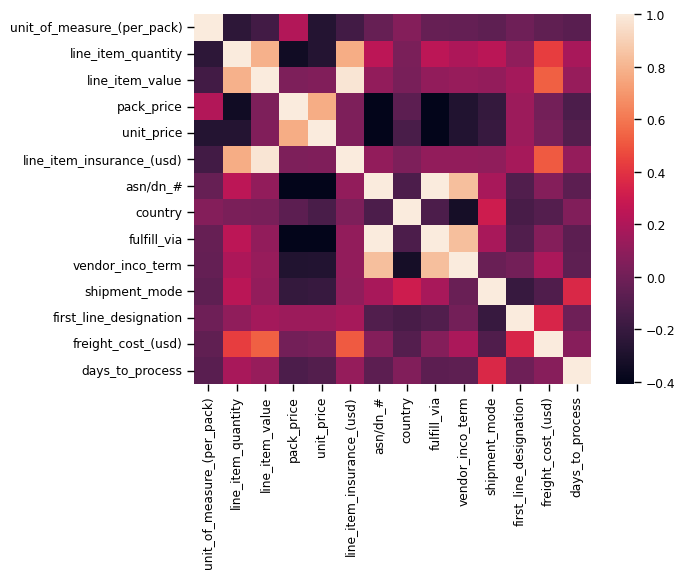

In [128]:
sns.heatmap(data.corr())

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoCV

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [130]:
train, test, = train_test_split(data, test_size=0.20, random_state=42)

In [131]:
train.shape

(8095, 14)

In [132]:
test.shape

(2024, 14)

In [133]:
scaler=StandardScaler()
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [134]:
scaled_train

array([[-0.84881115, -0.61712231, -0.59191706, ...,  0.68708503,
         1.41980199, -1.78534156],
       [ 0.66501957, -0.55662148,  0.78220838, ...,  0.68708503,
         0.34528357,  0.24602138],
       [-0.84881115,  2.0536584 ,  2.17382475, ...,  0.68708503,
        -0.96669072,  0.26326067],
       ...,
       [ 2.39511183,  1.92404585, -0.16704242, ...,  0.68708503,
        -0.96669072,  1.05626798],
       [-0.20002656,  0.96541712, -0.30412583, ...,  0.68708503,
        -0.96669072, -0.84005386],
       [-0.84881115, -0.72760789, -0.74289691, ...,  0.68708503,
        -0.70994317, -0.10451084]])

In [135]:
data_train_scaled=pd.DataFrame(scaled_train,columns=data.columns)
data_train_scaled

unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                      -0.848811           -0.617122        -0.591917   
1                       0.665020           -0.556621         0.782208   
2                      -0.848811            2.053658         2.173825   
3                      -0.200027           -0.474689        -0.700253   
4                      -0.200027           -0.408132        -0.356525   
...                          ...                 ...              ...   
8090                    0.665020           -0.524607         1.103102   
8091                   -0.848811            2.053658         1.784263   
8092                    2.395112            1.924046        -0.167042   
8093                   -0.200027            0.965417        -0.304126   
8094                   -0.848811           -0.727608        -0.742897   

      pack_price  unit_price  line_item_insurance_(usd)  asn/dn_#   country  \
0      -0.251270    0.252018                  -0.578975  0.970659 -0.560144   
1       2.184955    1.353052                   0.985349 -1.030228 -0.377317   
2      -0.397873    0.013956                   2.160068  0.970659 -0.377317   
3      -0.880518   -0.878775                  -0.720534  0.970659 -0.272129   
4      -0.324873   -0.402652                  -0.166891  0.970659 -0.011663   
...          ...         ...                        ...       ...       ...   
8090    2.184955    1.412568                   1.745771 -1.030228 -1.622044   
8091   -0.808121   -0.640713                   1.400384 -1.030228 -0.011663   
8092   -0.876295   -0.938290                  -0.091341 -1.030228  1.621259   
8093   -0.851559   -0.849017                  -0.150316 -1.030228  1.621259   
8094   -0.397270    0.013956                  -0.741487  0.970659 -0.011663   

      fulfill_via  vendor_inco_term  shipment_mode  first_line_designation  \
0        0.970659          0.814431       1.541946                0.687085   
1       -1.030228         -0.406461      -0.720525                0.687085   
2        0.970659          0.814431       1.541946                0.687085   
3        0.970659          0.814431       1.541946               -1.455424   
4        0.970659          0.814431      -0.720525                0.687085   
...           ...               ...            ...                     ...   
8090    -1.030228         -0.406461      -0.720525                0.687085   
8091    -1.030228         -0.406461      -0.720525                0.687085   
8092    -1.030228         -1.627354       0.787789                0.687085   
8093    -1.030228         -1.627354      -0.720525                0.687085   
8094     0.970659          0.814431      -0.720525                0.687085   

      freight_cost_(usd)  days_to_process  
0               1.419802        -1.785342  
1               0.345284         0.246021  
2              -0.966691         0.263261  
3              -0.352291         1.085000  
4              -0.030264         0.142586  
...                  ...              ...  
8090            0.678936         0.211543  
8091            2.045578        -0.110257  
8092           -0.966691         1.056268  
8093           -0.966691        -0.840054  
8094           -0.709943        -0.104511  

[8095 rows x 14 columns]

In [136]:
data_test_scaled=pd.DataFrame(scaled_test,columns=data.columns)
data_test_scaled

unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                      -0.848811            1.255675        -0.087540   
1                       2.395112           -0.497319        -0.708760   
2                      -0.848811            0.162733        -0.195715   
3                       0.448758           -0.734264        -0.734168   
4                       0.665020           -0.714629        -0.505672   
...                          ...                 ...              ...   
2019                    2.395112           -0.740786        -0.756658   
2020                   -0.848811           -0.386633        -0.537068   
2021                   -0.200027            1.522038         0.828921   
2022                   -0.848811            2.053658         1.316413   
2023                   -0.956942           -0.075344         0.673800   

      pack_price  unit_price  line_item_insurance_(usd)  asn/dn_#   country  \
0      -0.812344   -0.670471                  -0.218931  0.970659 -0.011663   
1      -0.888964   -0.938290                  -0.688956  0.970659  0.719646   
2      -0.651865   -0.402652                   0.071417  0.970659 -0.297174   
3       0.942070    0.103229                  -0.729731 -1.030228  1.621259   
4       2.184955    1.680387                  -0.518328 -1.030228 -1.489307   
...          ...         ...                        ...       ...       ...   
2019    1.313706   -0.640713                  -0.760178  0.970659  1.007661   
2020   -0.651865   -0.402652                  -0.434515  0.970659 -0.297174   
2021   -0.607220   -0.640713                   0.360141  0.970659  1.007661   
2022   -0.728485   -0.521682                   2.160068 -1.030228  1.621259   
2023    0.206036    1.412568                   0.813197 -1.030228 -0.617747   

      fulfill_via  vendor_inco_term  shipment_mode  first_line_designation  \
0        0.970659          0.814431       1.541946               -1.455424   
1        0.970659          0.814431      -0.720525               -1.455424   
2        0.970659          0.814431      -0.720525               -1.455424   
3       -1.030228         -1.627354       1.541946                0.687085   
4       -1.030228         -0.406461      -0.720525               -1.455424   
...           ...               ...            ...                     ...   
2019     0.970659          0.814431      -0.720525               -1.455424   
2020     0.970659          0.814431      -0.720525                0.687085   
2021     0.970659          0.814431       0.033632               -1.455424   
2022    -1.030228         -1.627354       0.787789                0.687085   
2023    -1.030228         -0.406461      -0.720525                0.687085   

      freight_cost_(usd)  days_to_process  
0              -0.352291         0.608046  
1              -0.352291         0.665511  
2              -0.352291         0.113853  
3              -0.966691        -0.598704  
4              -0.352291         0.625286  
...                  ...              ...  
2019           -0.352291        -1.785342  
2020           -0.042686        -0.018314  
2021           -0.352291         0.751707  
2022           -0.857563         0.901114  
2023            2.045578        -1.785342  

[2024 rows x 14 columns]

In [137]:
x_train=data_train_scaled.drop(["line_item_value"],axis=1)
y_train=data_train_scaled["line_item_value"]

x_test=data_test_scaled.drop(["line_item_value"],axis=1)
y_test=data_test_scaled["line_item_value"]

In [138]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [139]:
lr.score(x_train,y_train)

0.9519938365063318

In [140]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [141]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [142]:
mae, rmse, r2_square=evaluate_model(y_test,y_pred_test)
print('Model Training Performance')
print("RMSE:",rmse)
print("MAE:",mae)
print("R2 score",r2_square*100)

Model Training Performance
RMSE: 0.20468403316727973
MAE: 0.11881226542867257
R2 score 95.59479262300343


In [143]:

lasso=LassoCV()
lasso.fit(x_train,y_train)
print("Best alpha built using lasso regressor is %f"%lasso.alpha_)
print("Best score using built-in LassoCV: %f" %lasso.score(x_train,y_train))

Best alpha built using lasso regressor is 0.000972
Best score using built-in LassoCV: 0.951966


In [144]:
y_pred_test_lasso=lasso.predict(x_test)

In [145]:
mae, rmse, r2_square=evaluate_model(y_test,y_pred_test_lasso)
print('Model Training Performance')
print("RMSE:",rmse)
print("MAE:",mae)
print("R2 score",r2_square*100)

Model Training Performance
RMSE: 0.20470527843506317
MAE: 0.11789404595169244
R2 score 95.59387809473256


In [146]:
coef = pd.Series(lasso.coef_, index = x_train.columns)
round(coef,2)

unit_of_measure_(per_pack)    0.00
line_item_quantity            0.14
pack_price                    0.05
unit_price                    0.01
line_item_insurance_(usd)     0.85
asn/dn_#                     -0.03
country                      -0.00
fulfill_via                  -0.00
vendor_inco_term              0.04
shipment_mode                 0.01
first_line_designation       -0.01
freight_cost_(usd)            0.03
days_to_process              -0.00
dtype: float64

In [147]:
#Feature importance by Lasso
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 12 variables and eliminated the other 1 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

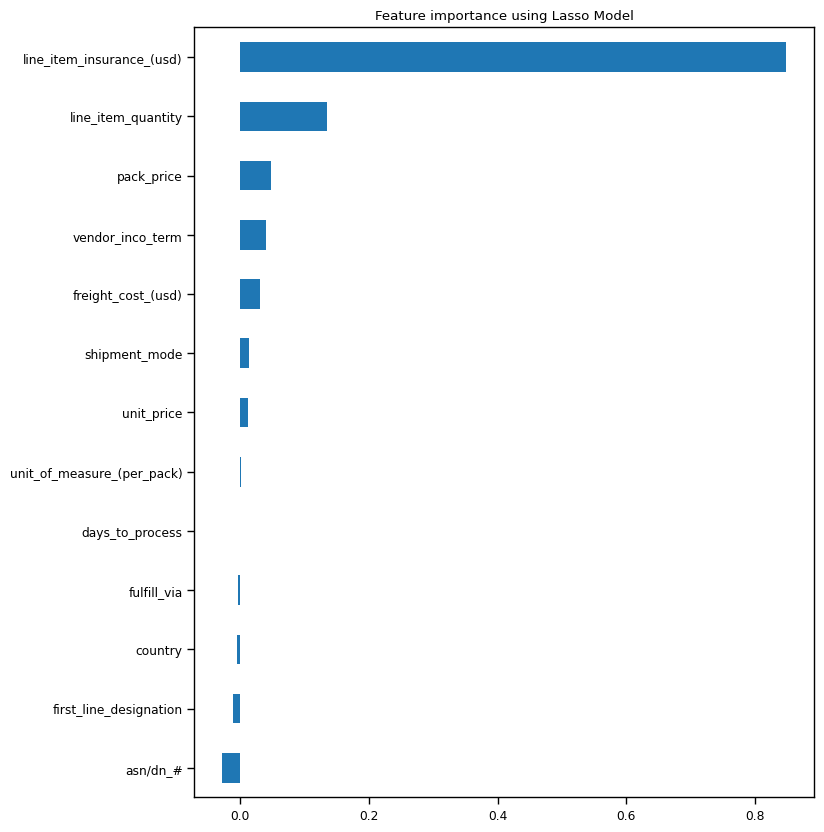

In [148]:
#Visualization

imp_coef_lasso = coef.sort_values()

import matplotlib

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)

imp_coef_lasso.plot(kind="barh")

plt.title("Feature importance using Lasso Model")

In [149]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [150]:
ridge_model = Ridge()

In [151]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}



In [152]:
param_dist = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}


In [153]:
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [154]:
random_search = RandomizedSearchCV(ridge_model, param_dist, n_iter=6, cv=5, random_state=42)
random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=6,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1, 10,
                                                  100]},
                   random_state=42)

In [155]:
best_alpha_grid = grid_search.best_params_['alpha']
best_alpha_random = random_search.best_params_['alpha']


In [156]:
final_ridge_model = Ridge(alpha=best_alpha_grid)  # or use best_alpha_random
final_ridge_model.fit(x_train, y_train)


Ridge(alpha=1)

In [157]:
y_pred_test_ridge=final_ridge_model.predict(x_test)

In [159]:
mae, rmse, r2_square=evaluate_model(y_test,y_pred_test_ridge)
print('Model Training Performance')
print("RMSE:",rmse)
print("MAE:",mae)
print("R2 score",r2_square*100)

Model Training Performance
RMSE: 0.20468473320257088
MAE: 0.11884939182977991
R2 score 95.59476249064915


In [160]:
data

unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                            30.0              19.000        551.00000   
1                           180.0            1000.000       6200.00000   
2                           100.0             500.000      40000.00000   
3                            60.0           31920.000     127360.80000   
4                            60.0           38000.000     121600.00000   
...                           ...                 ...              ...   
10319                        60.0           41987.375     409645.96125   
10320                        60.0           21072.000     137389.44000   
10321                        30.0           41987.375     409645.96125   
10322                        60.0           17465.000     113871.80000   
10323                        60.0           36639.000      72911.61000   

       pack_price  unit_price  line_item_insurance_(usd)  asn/dn_#  country  \
0        29.00000        0.97                      47.04     False     1046   
1         6.20000        0.03                      47.04     False      688   
2        52.80125        0.80                      47.04     False     1046   
3         3.99000        0.07                      47.04     False      688   
4         3.20000        0.05                      47.04     False      688   
...           ...         ...                        ...       ...      ...   
10319     3.60000        0.06                     593.83      True      535   
10320     6.52000        0.11                     161.71      True     1046   
10321     9.99000        0.33                     593.83      True      650   
10322     6.52000        0.11                     134.03      True      535   
10323     1.99000        0.03                      85.82      True      535   

       fulfill_via  vendor_inco_term  shipment_mode  first_line_designation  \
0            False                 5              0                    True   
1            False                 5              0                    True   
2            False                 6              0                    True   
3            False                 5              0                    True   
4            False                 5              0                    True   
...            ...               ...            ...                     ...   
10319         True                 7              3                   False   
10320         True                 7              3                   False   
10321         True                 7              3                   False   
10322         True                 7              3                    True   
10323         True                 7              3                   False   

       freight_cost_(usd)  days_to_process  
0               780.34000           -223.5  
1              4521.50000           -223.5  
2              1653.78000           -223.5  
3             16007.06000           -223.5  
4             17403.74875           -223.5  
...                   ...              ...  
10319          3549.77000            277.0  
10320          3549.77000            287.0  
10321             0.00000            387.0  
10322             0.00000             41.0  
10323             0.00000            299.0  

[10119 rows x 14 columns]

In [161]:
df

id project_code            pq_# po_/_so_# asn/dn_#        country  \
0          1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1          3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2          4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3         15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4         16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   
...      ...          ...             ...       ...      ...            ...   
10319  86818   103-ZW-T30       FPQ-15197  SO-50020  DN-4307       Zimbabwe   
10320  86819   104-CI-T30       FPQ-15259  SO-50102  DN-4313  Côte d'Ivoire   
10321  86821   110-ZM-T30       FPQ-14784  SO-49600  DN-4316         Zambia   
10322  86822   200-ZW-T30       FPQ-16523  SO-51680  DN-4334       Zimbabwe   
10323  86823   103-ZW-T30       FPQ-15197  SO-50022  DN-4336       Zimbabwe   

      managed_by  fulfill_via vendor_inco_term shipment_mode  ...  \
0       PMO - US  Direct Drop              EXW           Air  ...   
1       PMO - US  Direct Drop              EXW           Air  ...   
2       PMO - US  Direct Drop              FCA           Air  ...   
3       PMO - US  Direct Drop              EXW           Air  ...   
4       PMO - US  Direct Drop              EXW           Air  ...   
...          ...          ...              ...           ...  ...   
10319   PMO - US     From RDC   N/A - From RDC         Truck  ...   
10320   PMO - US     From RDC   N/A - From RDC         Truck  ...   
10321   PMO - US     From RDC   N/A - From RDC         Truck  ...   
10322   PMO - US     From RDC   N/A - From RDC         Truck  ...   
10323   PMO - US     From RDC   N/A - From RDC         Truck  ...   

      unit_of_measure_(per_pack) line_item_quantity line_item_value  \
0                             30                 19          551.00   
1                            240               1000         6200.00   
2                            100                500        40000.00   
3                             60              31920       127360.80   
4                             60              38000       121600.00   
...                          ...                ...             ...   
10319                         60             166571       599655.60   
10320                         60              21072       137389.44   
10321                         30             514526      5140114.74   
10322                         60              17465       113871.80   
10323                         60              36639        72911.61   

      pack_price unit_price              manufacturing_site  \
0          29.00       0.97      Ranbaxy Fine Chemicals LTD   
1           6.20       0.03       Aurobindo Unit III, India   
2          80.00       0.80   ABBVIE GmbH & Co.KG Wiesbaden   
3           3.99       0.07   Ranbaxy, Paonta Shahib, India   
4           3.20       0.05       Aurobindo Unit III, India   
...          ...        ...                             ...   
10319       3.60       0.06      Mylan,  H-12 & H-13, India   
10320       6.52       0.11    Hetero Unit III Hyderabad IN   
10321       9.99       0.33   Cipla Ltd A-42 MIDC Mahar. IN   
10322       6.52       0.11  Mylan (formerly Matrix) Nashik   
10323       1.99       0.03               Cipla, Goa, India   

      first_line_designation          weight_(kilograms)  \
0                        Yes                          13   
1                        Yes                         358   
2                        Yes                         171   
3                        Yes                        1855   
4                        Yes                        7590   
...                      ...                         ...   
10319                     No     See DN-4307 (ID#:83920)   
10320                     No     See DN-4313 (ID#:83921)   
10321                     No  Weight Captured Separately   
10322                 

In [168]:
data

unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                            30.0              19.000        551.00000   
1                           180.0            1000.000       6200.00000   
2                           100.0             500.000      40000.00000   
3                            60.0           31920.000     127360.80000   
4                            60.0           38000.000     121600.00000   
...                           ...                 ...              ...   
10319                        60.0           41987.375     409645.96125   
10320                        60.0           21072.000     137389.44000   
10321                        30.0           41987.375     409645.96125   
10322                        60.0           17465.000     113871.80000   
10323                        60.0           36639.000      72911.61000   

       pack_price  unit_price  line_item_insurance_(usd)  asn/dn_#  country  \
0        29.00000        0.97                      47.04     False     1046   
1         6.20000        0.03                      47.04     False      688   
2        52.80125        0.80                      47.04     False     1046   
3         3.99000        0.07                      47.04     False      688   
4         3.20000        0.05                      47.04     False      688   
...           ...         ...                        ...       ...      ...   
10319     3.60000        0.06                     593.83      True      535   
10320     6.52000        0.11                     161.71      True     1046   
10321     9.99000        0.33                     593.83      True      650   
10322     6.52000        0.11                     134.03      True      535   
10323     1.99000        0.03                      85.82      True      535   

       fulfill_via  vendor_inco_term  shipment_mode  first_line_designation  \
0            False                 5              0                    True   
1            False                 5              0                    True   
2            False                 6              0                    True   
3            False                 5              0                    True   
4            False                 5              0                    True   
...            ...               ...            ...                     ...   
10319         True                 7              3                   False   
10320         True                 7              3                   False   
10321         True                 7              3                   False   
10322         True                 7              3                    True   
10323         True                 7              3                   False   

       freight_cost_(usd)  days_to_process  
0               780.34000           -223.5  
1              4521.50000           -223.5  
2              1653.78000           -223.5  
3             16007.06000           -223.5  
4             17403.74875           -223.5  
...                   ...              ...  
10319          3549.77000            277.0  
10320          3549.77000            287.0  
10321             0.00000            387.0  
10322             0.00000             41.0  
10323             0.00000            299.0  

[10119 rows x 14 columns]

In [169]:
data.drop('days_to_process', axis= 1,inplace=True)

In [170]:
data

unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                            30.0              19.000        551.00000   
1                           180.0            1000.000       6200.00000   
2                           100.0             500.000      40000.00000   
3                            60.0           31920.000     127360.80000   
4                            60.0           38000.000     121600.00000   
...                           ...                 ...              ...   
10319                        60.0           41987.375     409645.96125   
10320                        60.0           21072.000     137389.44000   
10321                        30.0           41987.375     409645.96125   
10322                        60.0           17465.000     113871.80000   
10323                        60.0           36639.000      72911.61000   

       pack_price  unit_price  line_item_insurance_(usd)  asn/dn_#  country  \
0        29.00000        0.97                      47.04     False     1046   
1         6.20000        0.03                      47.04     False      688   
2        52.80125        0.80                      47.04     False     1046   
3         3.99000        0.07                      47.04     False      688   
4         3.20000        0.05                      47.04     False      688   
...           ...         ...                        ...       ...      ...   
10319     3.60000        0.06                     593.83      True      535   
10320     6.52000        0.11                     161.71      True     1046   
10321     9.99000        0.33                     593.83      True      650   
10322     6.52000        0.11                     134.03      True      535   
10323     1.99000        0.03                      85.82      True      535   

       fulfill_via  vendor_inco_term  shipment_mode  first_line_designation  \
0            False                 5              0                    True   
1            False                 5              0                    True   
2            False                 6              0                    True   
3            False                 5              0                    True   
4            False                 5              0                    True   
...            ...               ...            ...                     ...   
10319         True                 7              3                   False   
10320         True                 7              3                   False   
10321         True                 7              3                   False   
10322         True                 7              3                    True   
10323         True                 7              3                   False   

       freight_cost_(usd)  
0               780.34000  
1              4521.50000  
2              1653.78000  
3             16007.06000  
4             17403.74875  
...                   ...  
10319          3549.77000  
10320          3549.77000  
10321             0.00000  
10322             0.00000  
10323             0.00000  

[10119 rows x 13 columns]

In [171]:
train, test, = train_test_split(data, test_size=0.20, random_state=42)

In [172]:
scaler=StandardScaler()
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [173]:
x_train=data_train_scaled.drop(["line_item_value"],axis=1)
y_train=data_train_scaled["line_item_value"]

x_test=data_test_scaled.drop(["line_item_value"],axis=1)
y_test=data_test_scaled["line_item_value"]

In [174]:
x_train=data_train_scaled.drop(["line_item_value"],axis=1)
y_train=data_train_scaled["line_item_value"]

x_test=data_test_scaled.drop(["line_item_value"],axis=1)
y_test=data_test_scaled["line_item_value"]

In [175]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [179]:
lr.predict(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.08754023 -0.70876023 -0.19571508 ...  0.82892147  1.3164127
  0.67380028].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [176]:
lr.score(x_train,y_train)

0.9519938365063318

In [177]:
data

unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                            30.0              19.000        551.00000   
1                           180.0            1000.000       6200.00000   
2                           100.0             500.000      40000.00000   
3                            60.0           31920.000     127360.80000   
4                            60.0           38000.000     121600.00000   
...                           ...                 ...              ...   
10319                        60.0           41987.375     409645.96125   
10320                        60.0           21072.000     137389.44000   
10321                        30.0           41987.375     409645.96125   
10322                        60.0           17465.000     113871.80000   
10323                        60.0           36639.000      72911.61000   

       pack_price  unit_price  line_item_insurance_(usd)  asn/dn_#  country  \
0        29.00000        0.97                      47.04     False     1046   
1         6.20000        0.03                      47.04     False      688   
2        52.80125        0.80                      47.04     False     1046   
3         3.99000        0.07                      47.04     False      688   
4         3.20000        0.05                      47.04     False      688   
...           ...         ...                        ...       ...      ...   
10319     3.60000        0.06                     593.83      True      535   
10320     6.52000        0.11                     161.71      True     1046   
10321     9.99000        0.33                     593.83      True      650   
10322     6.52000        0.11                     134.03      True      535   
10323     1.99000        0.03                      85.82      True      535   

       fulfill_via  vendor_inco_term  shipment_mode  first_line_designation  \
0            False                 5              0                    True   
1            False                 5              0                    True   
2            False                 6              0                    True   
3            False                 5              0                    True   
4            False                 5              0                    True   
...            ...               ...            ...                     ...   
10319         True                 7              3                   False   
10320         True                 7              3                   False   
10321         True                 7              3                   False   
10322         True                 7              3                    True   
10323         True                 7              3                   False   

       freight_cost_(usd)  
0               780.34000  
1              4521.50000  
2              1653.78000  
3             16007.06000  
4             17403.74875  
...                   ...  
10319          3549.77000  
10320          3549.77000  
10321             0.00000  
10322             0.00000  
10323             0.00000  

[10119 rows x 13 columns]

In [180]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [181]:
mae, rmse, r2_square=evaluate_model(y_test,y_pred_test)
print('Model Training Performance')
print("RMSE:",rmse)
print("MAE:",mae)
print("R2 score",r2_square*100)

Model Training Performance
RMSE: 0.20468403316727973
MAE: 0.11881226542867257
R2 score 95.59479262300343


In [182]:
data.drop('country', axis= 1,inplace=True)

In [183]:
data

unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                            30.0              19.000        551.00000   
1                           180.0            1000.000       6200.00000   
2                           100.0             500.000      40000.00000   
3                            60.0           31920.000     127360.80000   
4                            60.0           38000.000     121600.00000   
...                           ...                 ...              ...   
10319                        60.0           41987.375     409645.96125   
10320                        60.0           21072.000     137389.44000   
10321                        30.0           41987.375     409645.96125   
10322                        60.0           17465.000     113871.80000   
10323                        60.0           36639.000      72911.61000   

       pack_price  unit_price  line_item_insurance_(usd)  asn/dn_#  \
0        29.00000        0.97                      47.04     False   
1         6.20000        0.03                      47.04     False   
2        52.80125        0.80                      47.04     False   
3         3.99000        0.07                      47.04     False   
4         3.20000        0.05                      47.04     False   
...           ...         ...                        ...       ...   
10319     3.60000        0.06                     593.83      True   
10320     6.52000        0.11                     161.71      True   
10321     9.99000        0.33                     593.83      True   
10322     6.52000        0.11                     134.03      True   
10323     1.99000        0.03                      85.82      True   

       fulfill_via  vendor_inco_term  shipment_mode  first_line_designation  \
0            False                 5              0                    True   
1            False                 5              0                    True   
2            False                 6              0                    True   
3            False                 5              0                    True   
4            False                 5              0                    True   
...            ...               ...            ...                     ...   
10319         True                 7              3                   False   
10320         True                 7              3                   False   
10321         True                 7              3                   False   
10322         True                 7              3                    True   
10323         True                 7              3                   False   

       freight_cost_(usd)  
0               780.34000  
1              4521.50000  
2              1653.78000  
3             16007.06000  
4             17403.74875  
...                   ...  
10319          3549.77000  
10320          3549.77000  
10321             0.00000  
10322             0.00000  
10323             0.00000  

[10119 rows x 12 columns]

In [184]:
train, test, = train_test_split(data, test_size=0.20, random_state=42)

In [185]:
scaler=StandardScaler()
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [186]:
x_train=data_train_scaled.drop(["line_item_value"],axis=1)
y_train=data_train_scaled["line_item_value"]

x_test=data_test_scaled.drop(["line_item_value"],axis=1)
y_test=data_test_scaled["line_item_value"]

In [187]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [188]:
lr.score(x_train,y_train)

0.9519938365063318

In [189]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [191]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [192]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False, max_depth=5),
    "AdaBoost Regressor": AdaBoostRegressor(), 
    "SVR": SVR()
}

In [193]:
def evaluate_reg(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [194]:
def evaluate_models(X_train, X_test, y_train, y_test, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''    
    models_list = []
    r2_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Evaluate Train and Test dataset
        model_train_mae , model_train_rmse, model_train_r2 = evaluate_reg(y_train, y_train_pred)

        model_test_mae , model_test_rmse, model_test_r2 = evaluate_reg(y_test, y_test_pred)


        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
        print("- R2 Score: {:.4f}".format(model_train_r2))

        print('----------------------------------')

        print('Model performance for Test set')
        print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
        print("- R2 Score: {:.4f}".format(model_test_r2))
        r2_list.append(model_test_r2)

        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name', 'r2_score']).sort_values(by=['r2_score'], ascending=False)
        
    return report

In [195]:
base_report = evaluate_models(x_train, x_test, y_train, y_test, models)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.2191
- Mean Absolute Error: 0.1188
- R2 Score: 0.9520
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2047
- Mean Absolute Error: 0.1188
- R2 Score: 0.9559


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1690
- Mean Absolute Error: 0.0894
- R2 Score: 0.9714
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2102
- Mean Absolute Error: 0.1159
- R2 Score: 0.9536


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0071
- Mean Absolute Error: 0.0001
- R2 Score: 0.9999
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1671
- Mean Absolute Error: 0.0672
- R2 Score: 0.9706


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0441
- Mean Absolute Error: 0.0185
- R2 Score: 0.99

In [196]:
data

unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                            30.0              19.000        551.00000   
1                           180.0            1000.000       6200.00000   
2                           100.0             500.000      40000.00000   
3                            60.0           31920.000     127360.80000   
4                            60.0           38000.000     121600.00000   
...                           ...                 ...              ...   
10319                        60.0           41987.375     409645.96125   
10320                        60.0           21072.000     137389.44000   
10321                        30.0           41987.375     409645.96125   
10322                        60.0           17465.000     113871.80000   
10323                        60.0           36639.000      72911.61000   

       pack_price  unit_price  line_item_insurance_(usd)  asn/dn_#  \
0        29.00000        0.97                      47.04     False   
1         6.20000        0.03                      47.04     False   
2        52.80125        0.80                      47.04     False   
3         3.99000        0.07                      47.04     False   
4         3.20000        0.05                      47.04     False   
...           ...         ...                        ...       ...   
10319     3.60000        0.06                     593.83      True   
10320     6.52000        0.11                     161.71      True   
10321     9.99000        0.33                     593.83      True   
10322     6.52000        0.11                     134.03      True   
10323     1.99000        0.03                      85.82      True   

       fulfill_via  vendor_inco_term  shipment_mode  first_line_designation  \
0            False                 5              0                    True   
1            False                 5              0                    True   
2            False                 6              0                    True   
3            False                 5              0                    True   
4            False                 5              0                    True   
...            ...               ...            ...                     ...   
10319         True                 7              3                   False   
10320         True                 7              3                   False   
10321         True                 7              3                   False   
10322         True                 7              3                    True   
10323         True                 7              3                   False   

       freight_cost_(usd)  
0               780.34000  
1              4521.50000  
2              1653.78000  
3             16007.06000  
4             17403.74875  
...                   ...  
10319          3549.77000  
10320          3549.77000  
10321             0.00000  
10322             0.00000  
10323             0.00000  

[10119 rows x 12 columns]

In [197]:
data

unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                            30.0              19.000        551.00000   
1                           180.0            1000.000       6200.00000   
2                           100.0             500.000      40000.00000   
3                            60.0           31920.000     127360.80000   
4                            60.0           38000.000     121600.00000   
...                           ...                 ...              ...   
10319                        60.0           41987.375     409645.96125   
10320                        60.0           21072.000     137389.44000   
10321                        30.0           41987.375     409645.96125   
10322                        60.0           17465.000     113871.80000   
10323                        60.0           36639.000      72911.61000   

       pack_price  unit_price  line_item_insurance_(usd)  asn/dn_#  \
0        29.00000        0.97                      47.04     False   
1         6.20000        0.03                      47.04     False   
2        52.80125        0.80                      47.04     False   
3         3.99000        0.07                      47.04     False   
4         3.20000        0.05                      47.04     False   
...           ...         ...                        ...       ...   
10319     3.60000        0.06                     593.83      True   
10320     6.52000        0.11                     161.71      True   
10321     9.99000        0.33                     593.83      True   
10322     6.52000        0.11                     134.03      True   
10323     1.99000        0.03                      85.82      True   

       fulfill_via  vendor_inco_term  shipment_mode  first_line_designation  \
0            False                 5              0                    True   
1            False                 5              0                    True   
2            False                 6              0                    True   
3            False                 5              0                    True   
4            False                 5              0                    True   
...            ...               ...            ...                     ...   
10319         True                 7              3                   False   
10320         True                 7              3                   False   
10321         True                 7              3                   False   
10322         True                 7              3                    True   
10323         True                 7              3                   False   

       freight_cost_(usd)  
0               780.34000  
1              4521.50000  
2              1653.78000  
3             16007.06000  
4             17403.74875  
...                   ...  
10319          3549.77000  
10320          3549.77000  
10321             0.00000  
10322             0.00000  
10323             0.00000  

[10119 rows x 12 columns]

In [198]:
data.drop('asn/dn_#', axis= 1,inplace=True)

In [199]:
data

unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                            30.0              19.000        551.00000   
1                           180.0            1000.000       6200.00000   
2                           100.0             500.000      40000.00000   
3                            60.0           31920.000     127360.80000   
4                            60.0           38000.000     121600.00000   
...                           ...                 ...              ...   
10319                        60.0           41987.375     409645.96125   
10320                        60.0           21072.000     137389.44000   
10321                        30.0           41987.375     409645.96125   
10322                        60.0           17465.000     113871.80000   
10323                        60.0           36639.000      72911.61000   

       pack_price  unit_price  line_item_insurance_(usd)  fulfill_via  \
0        29.00000        0.97                      47.04        False   
1         6.20000        0.03                      47.04        False   
2        52.80125        0.80                      47.04        False   
3         3.99000        0.07                      47.04        False   
4         3.20000        0.05                      47.04        False   
...           ...         ...                        ...          ...   
10319     3.60000        0.06                     593.83         True   
10320     6.52000        0.11                     161.71         True   
10321     9.99000        0.33                     593.83         True   
10322     6.52000        0.11                     134.03         True   
10323     1.99000        0.03                      85.82         True   

       vendor_inco_term  shipment_mode  first_line_designation  \
0                     5              0                    True   
1                     5              0                    True   
2                     6              0                    True   
3                     5              0                    True   
4                     5              0                    True   
...                 ...            ...                     ...   
10319                 7              3                   False   
10320                 7              3                   False   
10321                 7              3                   False   
10322                 7              3                    True   
10323                 7              3                   False   

       freight_cost_(usd)  
0               780.34000  
1              4521.50000  
2              1653.78000  
3             16007.06000  
4             17403.74875  
...                   ...  
10319          3549.77000  
10320          3549.77000  
10321             0.00000  
10322             0.00000  
10323             0.00000  

[10119 rows x 11 columns]

In [200]:
train, test, = train_test_split(data, test_size=0.20, random_state=42)

In [201]:
scaler=StandardScaler()
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [202]:
x_train=data_train_scaled.drop(["line_item_value"],axis=1)
y_train=data_train_scaled["line_item_value"]

x_test=data_test_scaled.drop(["line_item_value"],axis=1)
y_test=data_test_scaled["line_item_value"]

In [203]:
base_report = evaluate_models(x_train, x_test, y_train, y_test, models)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.2191
- Mean Absolute Error: 0.1188
- R2 Score: 0.9520
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2047
- Mean Absolute Error: 0.1188
- R2 Score: 0.9559


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1690
- Mean Absolute Error: 0.0894
- R2 Score: 0.9714
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2102
- Mean Absolute Error: 0.1159
- R2 Score: 0.9536


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0071
- Mean Absolute Error: 0.0001
- R2 Score: 0.9999
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1649
- Mean Absolute Error: 0.0658
- R2 Score: 0.9714


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0429
- Mean Absolute Error: 0.0182
- R2 Score: 0.99